In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("first inten project.csv")
df

Booking_ID  number of adults  number of children  \
0       INN00001                 1                   1   
1       INN00002                 1                   0   
2       INN00003                 2                   1   
3       INN00004                 1                   0   
4       INN00005                 1                   0   
...          ...               ...                 ...   
36280   INN36282                 2                   0   
36281   INN36283                 2                   0   
36282   INN36284                 2                   0   
36283   INN36285                 3                   0   
36284   INN36286                 2                   0   

       number of weekend nights  number of week nights  type of meal  \
0                             2                      5   Meal Plan 1   
1                             1                      3  Not Selected   
2                             1                      3   Meal Plan 1   
3                             0                      2   Meal Plan 1   
4                             1                      2  Not Selected   
...                         ...                    ...           ...   
36280                         0                      2   Meal Plan 2   
36281                         1                      3   Meal Plan 1   
36282                         1                      3   Meal Plan 1   
36283                         0                      4   Meal Plan 1   
36284                         0                      5   Meal Plan 1   

       car parking space    room type  lead time market segment type  \
0                      0  Room_Type 1        224             Offline   
1                      0  Room_Type 1          5              Online   
2                      0  Room_Type 1          1              Online   
3                      0  Room_Type 1        211              Online   
4                      0  Room_Type 1         48              Online   
...                  ...          ...        ...                 ...   
36280                  0  Room_Type 1        346              Online   
36281                  0  Room_Type 1         34              Online   
36282                  0  Room_Type 4         83              Online   
36283                  0  Room_Type 1        121             Offline   
36284                  0  Room_Type 4         44              Online   

       repeated  P-C  P-not-C  average price   special requests  \
0             0    0        0           88.00                 0   
1             0    0        0          106.68                 1   
2             0    0        0           50.00                 0   
3             0    0        0          100.00                 1   
4             0    0        0           77.00                 0   
...         ...  ...      ...             ...               ...   
36280         0    0        0          115.00                 1   
36281         0    0        0          107.55                 1   
36282         0    0        0          105.61                 1   
36283         0    0        0           96.90                 1   
36284         0    0        0          133.44                 3   

      date of reservation booking status  
0               10/2/2015   Not_Canceled  
1               11/6/2018   Not_Canceled  
2               2/28/2018       Canceled  
3               5/20/2017       Canceled  
4               4/11/2018       Canceled  
...                   ...            ...  
36280           9/13/2018       Canceled  
36281          10/15/2017   Not_Canceled  
36282          12/26/2018   Not_Canceled  
36283            7/6/2018   Not_Canceled  
36284          10/18/2018   Not_Canceled  

[36285 rows x 17 columns]

data preprocessing 

In [3]:
df.isna().sum()

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
df.shape

(36285, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [7]:
df.describe()

number of adults  number of children  number of weekend nights  \
count      36285.000000        36285.000000              36285.000000   
mean           1.844839            0.105360                  0.810693   
std            0.518813            0.402704                  0.870590   
min            0.000000            0.000000                  0.000000   
25%            2.000000            0.000000                  0.000000   
50%            2.000000            0.000000                  1.000000   
75%            2.000000            0.000000                  2.000000   
max            4.000000           10.000000                  7.000000   

       number of week nights  car parking space     lead time      repeated  \
count           36285.000000       36285.000000  36285.000000  36285.000000   
mean                2.204602           0.030977     85.239851      0.025630   
std                 1.410946           0.173258     85.938796      0.158032   
min                 0.000000           0.000000      0.000000      0.000000   
25%                 1.000000           0.000000     17.000000      0.000000   
50%                 2.000000           0.000000     57.000000      0.000000   
75%                 3.000000           0.000000    126.000000      0.000000   
max                17.000000           1.000000    443.000000      1.000000   

                P-C       P-not-C  average price   special requests  
count  36285.000000  36285.000000    36285.000000      36285.000000  
mean       0.023343      0.153369      103.421636          0.619733  
std        0.368281      1.753931       35.086469          0.786262  
min        0.000000      0.000000        0.000000          0.000000  
25%        0.000000      0.000000       80.300000          0.000000  
50%        0.000000      0.000000       99.450000          0.000000  
75%        0.000000      0.000000      120.000000          1.000000  
max       13.000000     58.000000      540.000000          5.000000

In [8]:
df["type of meal"].unique()

array(['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'],
      dtype=object)

In [9]:
df["room type"].unique()

array(['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6',
       'Room_Type 5', 'Room_Type 7', 'Room_Type 3'], dtype=object)

In [10]:
df["market segment type"].unique()

array(['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary'],
      dtype=object)

In [11]:
df["booking status"].unique()

array(['Not_Canceled', 'Canceled'], dtype=object)

In [12]:
new_df = df.drop("Booking_ID",axis="columns")

In [13]:
for column in new_df.columns:
    print("\nValue counts for :" ,column)
    print(new_df[column].value_counts())


Value counts for : number of adults
number of adults
2    26110
1     7702
3     2318
0      139
4       16
Name: count, dtype: int64

Value counts for : number of children
number of children
0     33583
1      1622
2      1058
3        19
9         2
10        1
Name: count, dtype: int64

Value counts for : number of weekend nights
number of weekend nights
0    16876
1    10000
2     9072
3      153
4      129
5       34
6       20
7        1
Name: count, dtype: int64

Value counts for : number of week nights
number of week nights
2     11447
1      9488
3      7842
4      2992
0      2387
5      1616
6       189
7       113
10       62
8        62
9        34
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: count, dtype: int64

Value counts for : type of meal
type of meal
Meal Plan 1     27842
Not Selected     5132
Meal Plan 2      3306
Meal Plan 3         5
Name: count, dtype: int64

Value counts for : car parking space
car parking space
0  

correlation map for the dataset

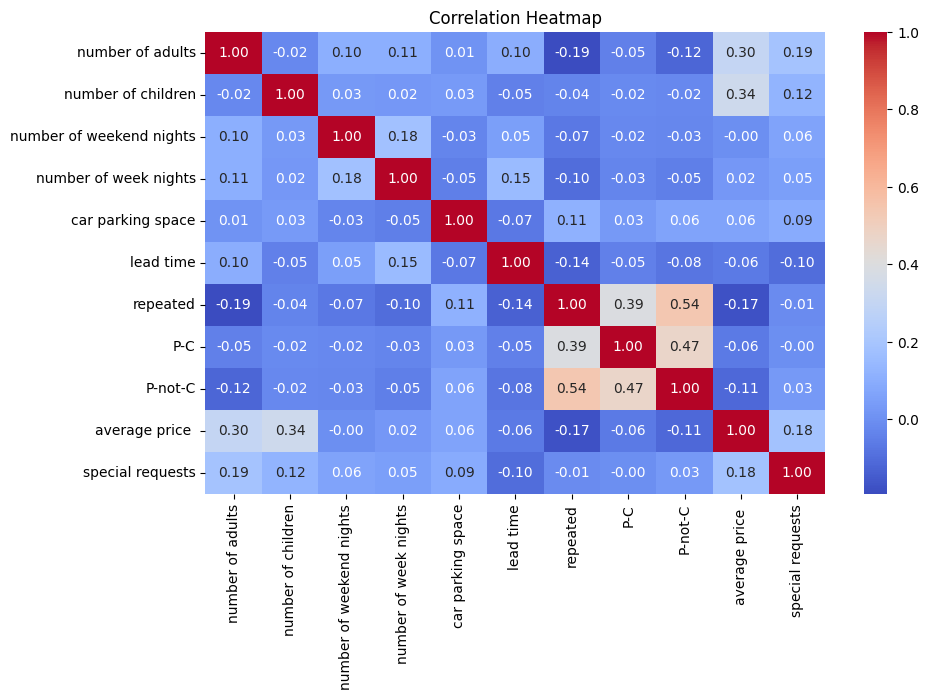

In [14]:
numerical = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10, 6))
sns.heatmap(numerical.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


comprision between week nights reservations and weekend nights reservations 

In [15]:
sum_of_nights = [df["number of week nights"].sum(),df["number of weekend nights"].sum()]

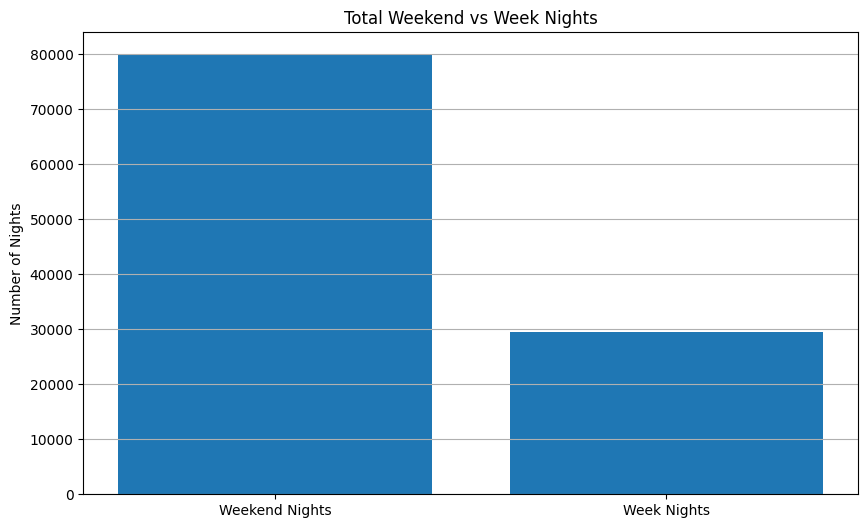

In [16]:
plt.figure(figsize=(10, 6))
plt.bar(['Weekend Nights', 'Week Nights'], sum_of_nights)
plt.title('Total Weekend vs Week Nights')
plt.ylabel('Number of Nights')
plt.grid(True, axis='y')
plt.show()

plotting of bookings according to categroical feautures 

C:\Users\Abdulrhman\AppData\Local\Temp\ipykernel_19884\3331905934.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'number of adults', palette = 'Set2', data = df)


<Axes: title={'center': ' bookings according to adults'}, xlabel='number of adults', ylabel='count'>

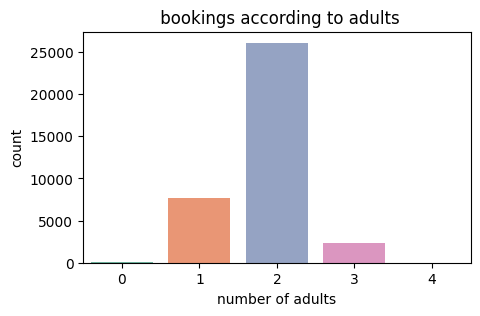

In [17]:

plt.figure(figsize = (5,3))
plt.gca().set_title(' bookings according to adults')
sns.countplot(x = 'number of adults', palette = 'Set2', data = df)

C:\Users\Abdulrhman\AppData\Local\Temp\ipykernel_19884\2540640154.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'number of children', palette = 'Set3', data = df)


<Axes: title={'center': 'bookings according to number of children'}, xlabel='number of children', ylabel='count'>

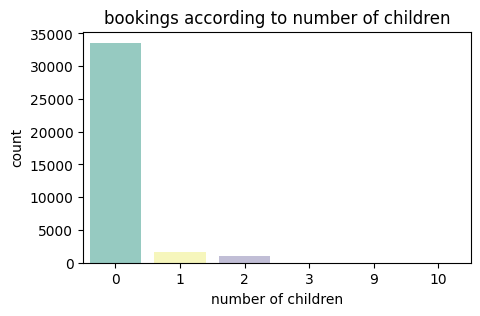

In [18]:
plt.figure(figsize = (5,3))
plt.gca().set_title('bookings according to number of children')
sns.countplot(x = 'number of children', palette = 'Set3', data = df)

In [19]:
# df["sum of children"]= df["number of children"].value_counts()

C:\Users\Abdulrhman\AppData\Local\Temp\ipykernel_19884\3473818230.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'type of meal', palette = 'Set1', data = df)


<Axes: title={'center': 'bookings according to type of meal'}, xlabel='type of meal', ylabel='count'>

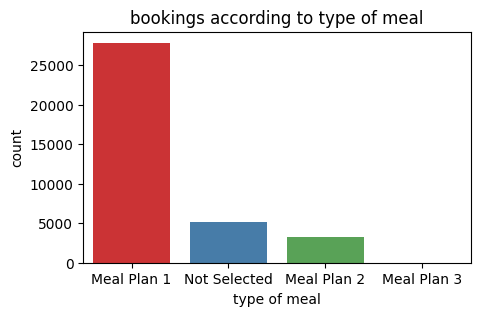

In [20]:
plt.figure(figsize = (5,3))
plt.gca().set_title('bookings according to type of meal')
sns.countplot(x = 'type of meal', palette = 'Set1', data = df)


C:\Users\Abdulrhman\AppData\Local\Temp\ipykernel_19884\3552801249.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'car parking space', palette = 'Set2', data = df)


<Axes: title={'center': 'bookings according to car parking space'}, xlabel='car parking space', ylabel='count'>

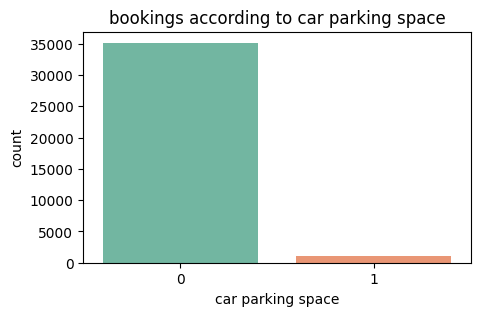

In [21]:
plt.figure(figsize = (5,3))
plt.gca().set_title('bookings according to car parking space')
sns.countplot(x = 'car parking space', palette = 'Set2', data = df)

C:\Users\Abdulrhman\AppData\Local\Temp\ipykernel_19884\2338365120.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'repeated', palette = 'Set1', data = df)


<Axes: title={'center': 'bookings according to repeated bookings'}, xlabel='repeated', ylabel='count'>

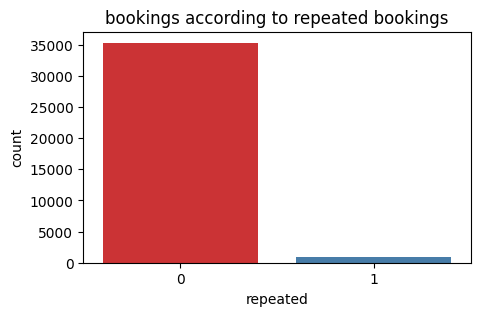

In [22]:
plt.figure(figsize = (5,3))
plt.gca().set_title('bookings according to repeated bookings')
sns.countplot(x = 'repeated', palette = 'Set1', data = df)

In [23]:
# plt.figure(figsize = (5,3))
# plt.gca().set_title('bookings according to market segment')
# sns.countplot(x = 'market segment type', palette = 'Set2', data = df)

C:\Users\Abdulrhman\AppData\Local\Temp\ipykernel_19884\3122844226.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'booking status', palette = 'Set2', data = df)


<Axes: title={'center': 'bookings according to booking status'}, xlabel='booking status', ylabel='count'>

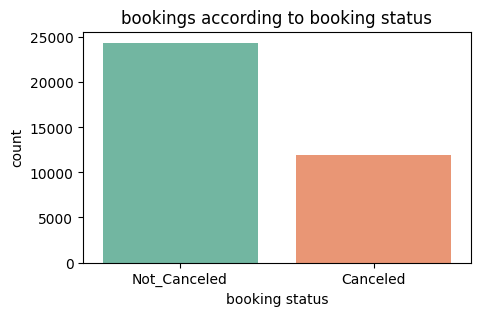

In [24]:
plt.figure(figsize = (5,3))
plt.gca().set_title('bookings according to booking status')
sns.countplot(x = 'booking status', palette = 'Set2', data = df)

C:\Users\Abdulrhman\AppData\Local\Temp\ipykernel_19884\3129598630.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'room type', palette = 'Set2', data = df)


<Axes: title={'center': 'bookings according to room_type'}, xlabel='room type', ylabel='count'>

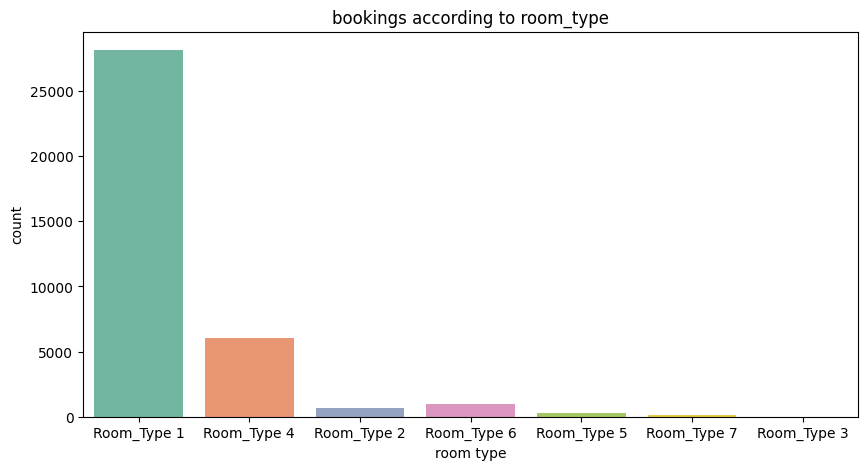

In [25]:
plt.figure(figsize = (10,5))
plt.gca().set_title('bookings according to room_type')
sns.countplot(x = 'room type', palette = 'Set2', data = df)

C:\Users\Abdulrhman\AppData\Local\Temp\ipykernel_19884\1591428636.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'P-C', palette = 'Set1', data = df)


<Axes: title={'center': 'bookingd according to previous canceled'}, xlabel='P-C', ylabel='count'>

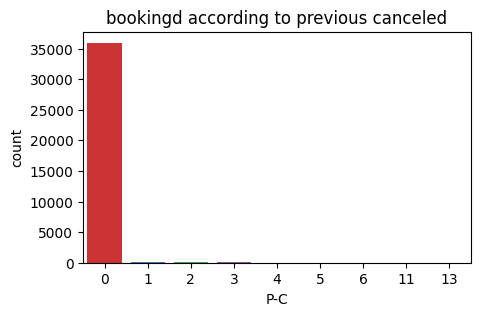

In [26]:
plt.figure(figsize = (5,3))
plt.gca().set_title('bookingd according to previous canceled')
sns.countplot(x = 'P-C', palette = 'Set1', data = df)

C:\Users\Abdulrhman\AppData\Local\Temp\ipykernel_19884\356909575.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'P-not-C', palette = 'Set3', data = df)


<Axes: title={'center': 'bookings according to previous not canceled'}, xlabel='P-not-C', ylabel='count'>

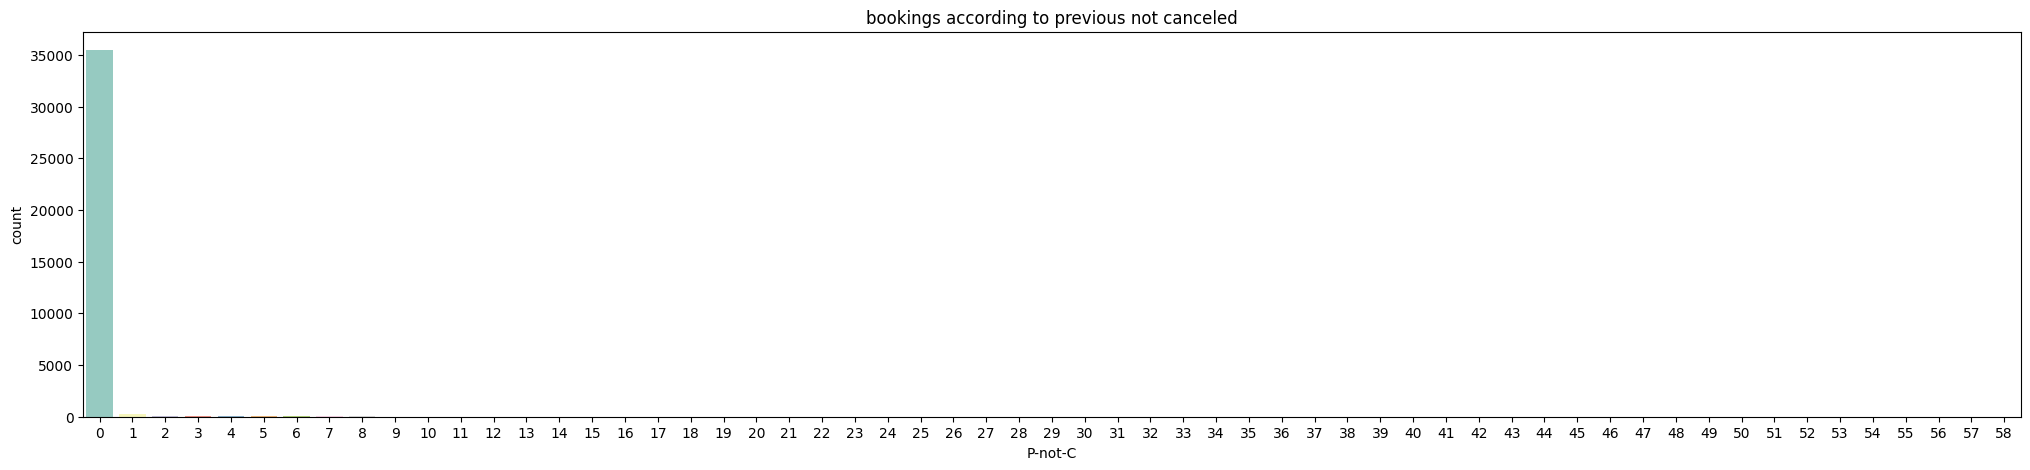

In [27]:
plt.figure(figsize = (25,5))
plt.gca().set_title('bookings according to previous not canceled')
sns.countplot(x = 'P-not-C', palette = 'Set3', data = df)

most market segment type used 

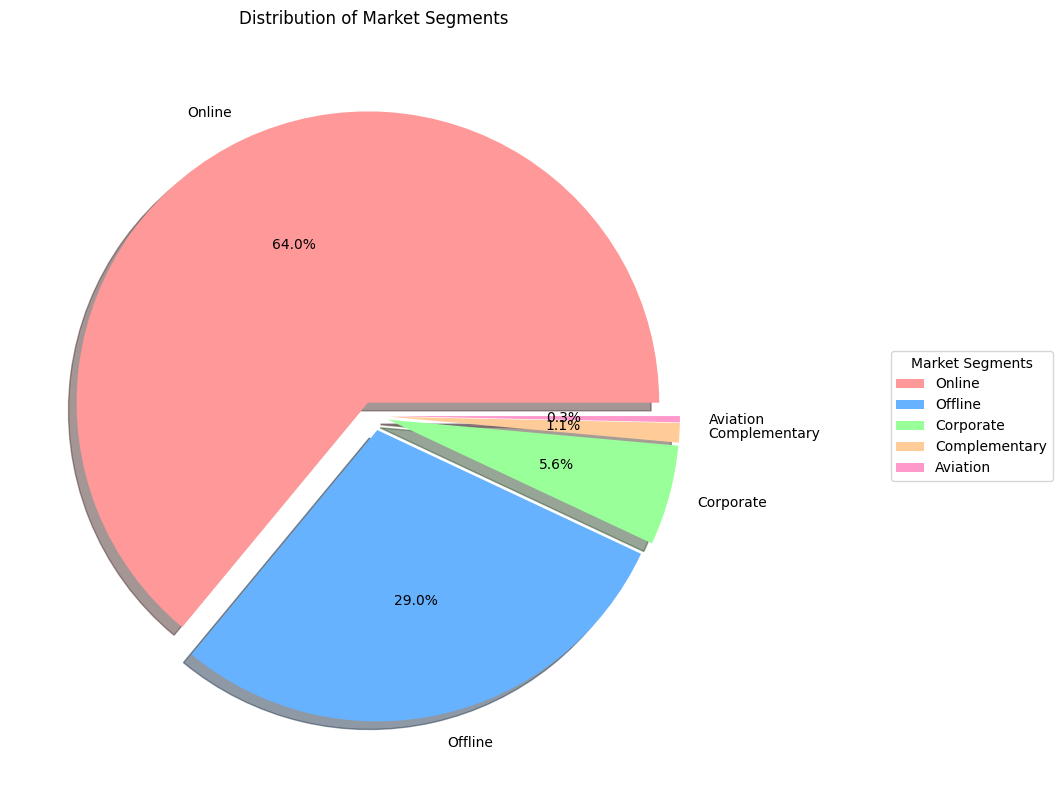

In [28]:
market_segments = df['market segment type'].value_counts()

plt.figure(figsize=(14, 8))
plt.pie(market_segments.values, 
        labels=market_segments.index,
        autopct='%1.1f%%',  
        colors=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF99CC'], 
        explode=[0.05] * len(market_segments), 
        shadow=True) 

plt.title('Distribution of Market Segments', pad=20)


plt.legend(market_segments.index, 
          title="Market Segments",
          loc="center left",
          bbox_to_anchor=(1.2, 0, 0.5, 1))

plt.tight_layout()
plt.show()

which day has the most bookings 

C:\Users\Abdulrhman\AppData\Local\Temp\ipykernel_19884\1142146978.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_count.index, y=day_count.values, palette="Reds_r")


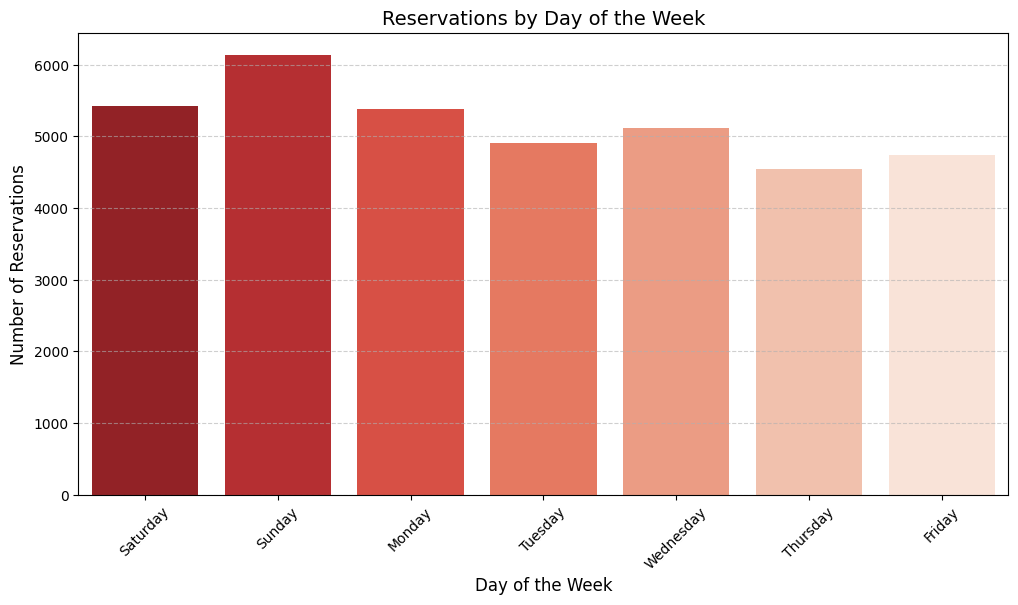

In [29]:
df['date of reservation'] = pd.to_datetime(df['date of reservation'], errors='coerce')
df['days'] = df['date of reservation'].dt.day_name()
day_count = df['days'].value_counts()
day_order = ["Saturday", "Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
day_count = day_count.reindex(day_order)


plt.figure(figsize=(12, 6))
sns.barplot(x=day_count.index, y=day_count.values, palette="Reds_r")
plt.title("Reservations by Day of the Week", fontsize=14)
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Number of Reservations", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()


which month has the most bookings 

C:\Users\Abdulrhman\AppData\Local\Temp\ipykernel_19884\2981609201.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=month_counts.index, y=month_counts.values, palette="Blues_r")


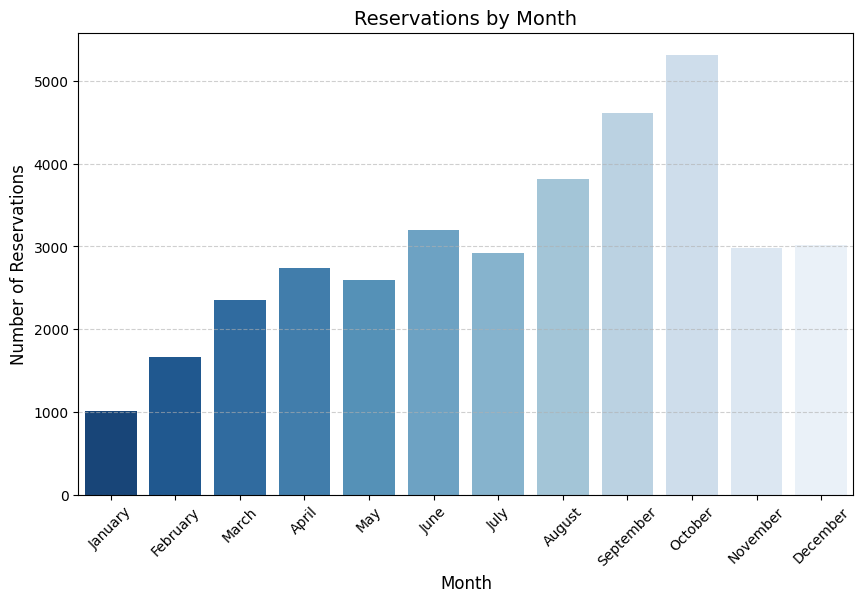

In [30]:
df['months'] = df['date of reservation'].dt.month_name()
month_counts = df['months'].value_counts()
month_order = ["January", "February", "March", "April", "May", "June", 
            "July", "August", "September", "October", "November", "December"]
month_counts = month_counts.reindex(month_order)

plt.figure(figsize=(10, 6))
sns.barplot(x=month_counts.index, y=month_counts.values, palette="Blues_r")

plt.title("Reservations by Month", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Reservations", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

the month has the highest canceled bookings

C:\Users\Abdulrhman\AppData\Local\Temp\ipykernel_19884\2938266833.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cancellation_counts.index, y=cancellation_counts.values, palette="Greens_r")


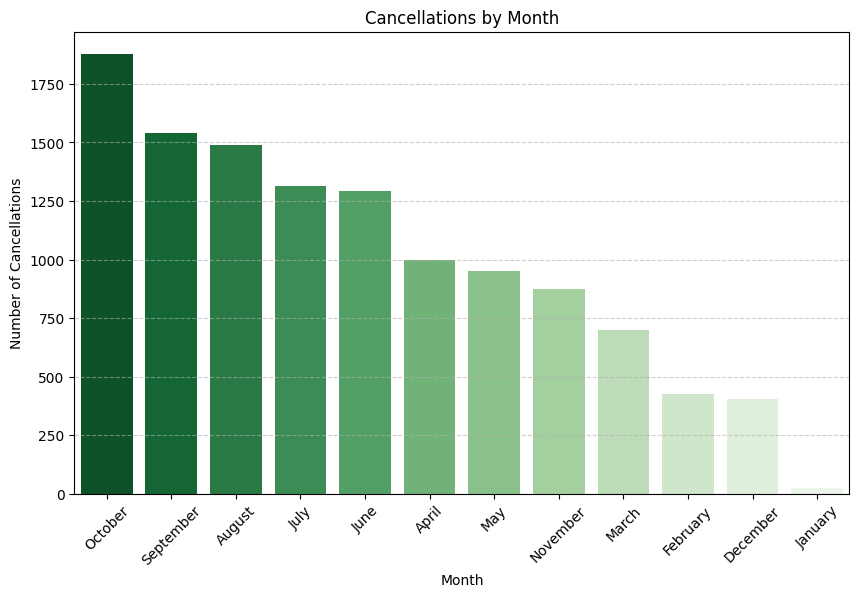

In [31]:
df['month'] = df['date of reservation'].dt.month_name()
cancellation_counts = df[df['booking status'] == 'Canceled']['month'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=cancellation_counts.index, y=cancellation_counts.values, palette="Greens_r")
plt.title("Cancellations by Month")
plt.xlabel("Month")
plt.ylabel("Number of Cancellations")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


bookings according to lead time 

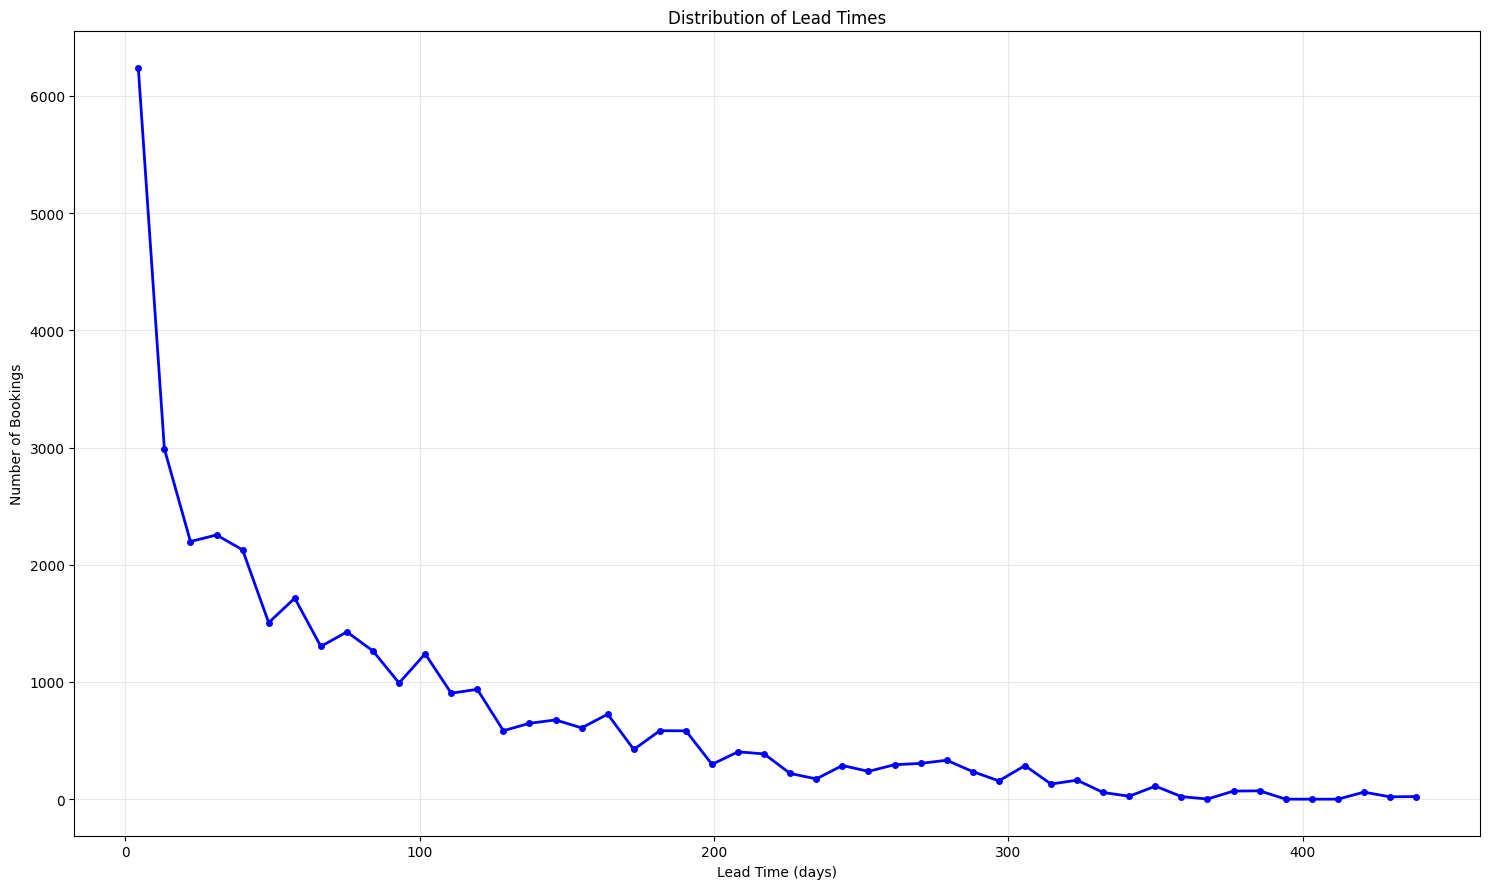

In [32]:
df['lead_time_category'] = pd.cut(df['lead time'], 
                                 bins=[0, 7, 30, 90, 180, float('inf')],
                                 labels=['0-7 days', '8-30 days', '31-90 days', 
                                       '91-180 days', '180+ days'])
plt.figure(figsize=(15, 9))
counts, bins = np.histogram(df['lead time'], bins=50)
bin_centers = (bins[:-1] + bins[1:]) / 2
plt.plot(bin_centers, counts, '-', color='blue', linewidth=2)
plt.plot(bin_centers, counts, 'o', color='blue', markersize=4)
plt.title('Distribution of Lead Times')
plt.xlabel('Lead Time (days)')
plt.ylabel('Number of Bookings')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

which lead time has the most booking rate

Text(0, 0.5, 'Number of Bookings')

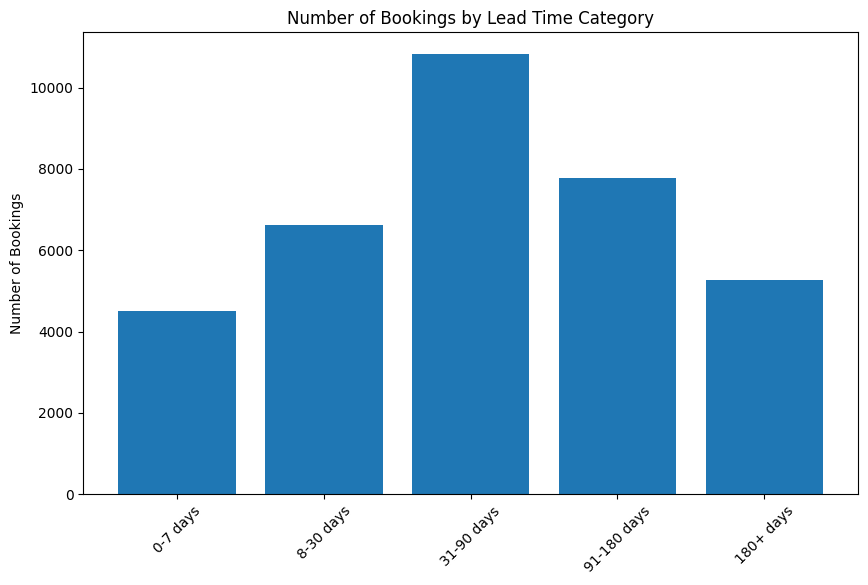

In [33]:
plt.figure(figsize=(10,6))
lead_time_counts = df['lead_time_category'].value_counts().sort_index()
plt.bar(lead_time_counts.index, lead_time_counts.values)
plt.title('Number of Bookings by Lead Time Category')
plt.xticks(rotation=45)
plt.ylabel('Number of Bookings')


which lead time has the most cancellation rate

Text(0, 0.5, 'Number of Cancellations')

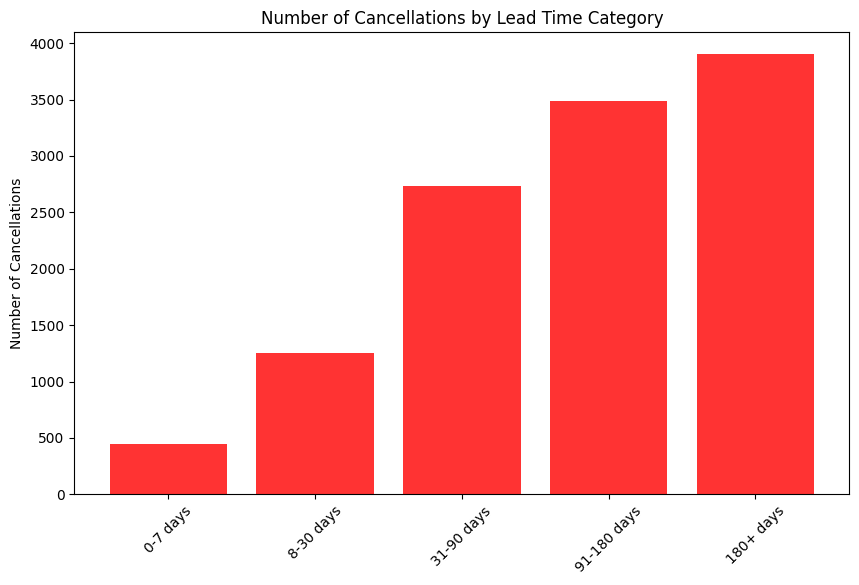

In [34]:
cancellations = df[df['booking status'] == 'Canceled']
cancellation_counts = cancellations['lead_time_category'].value_counts().sort_index()

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(cancellation_counts.index, cancellation_counts.values, color = "#FF3333")
plt.title('Number of Cancellations by Lead Time Category')
plt.xticks(rotation=45)
plt.ylabel('Number of Cancellations')

average price according to room type

In [35]:
room_prices = df.groupby("room type")["average price "].mean().sort_values()

as we see the most average prices is room type 6 

C:\Users\Abdulrhman\AppData\Local\Temp\ipykernel_19884\3844958703.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= room_prices.index, y=room_prices.values, palette="Reds_r")


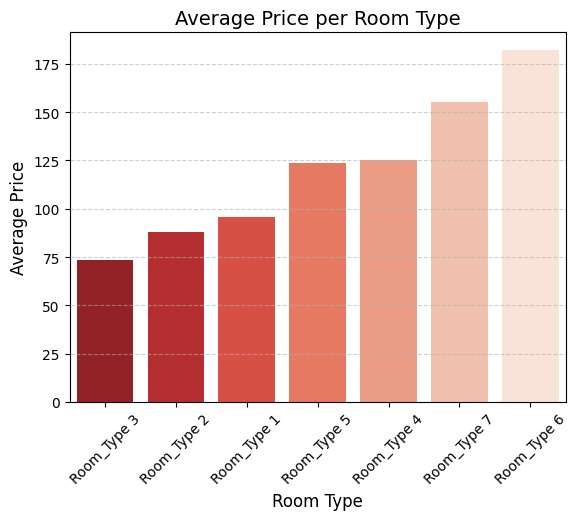

In [36]:
sns.barplot(x= room_prices.index, y=room_prices.values, palette="Reds_r")

plt.title("Average Price per Room Type", fontsize=14)
plt.xlabel("Room Type", fontsize=12)
plt.ylabel("Average Price", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

average price according to meal 

In [37]:
prices_meal = df.groupby("type of meal")["average price "].mean().sort_values()

C:\Users\Abdulrhman\AppData\Local\Temp\ipykernel_19884\1339639561.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= prices_meal.index, y=prices_meal.values, palette="Reds_r")


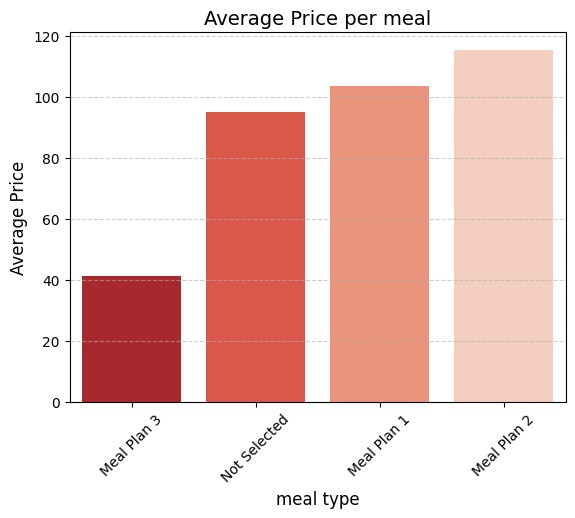

In [38]:
sns.barplot(x= prices_meal.index, y=prices_meal.values, palette="Reds_r")

plt.title("Average Price per meal", fontsize=14)
plt.xlabel("meal type", fontsize=12)
plt.ylabel("Average Price", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

In [39]:
special_request_prices = df.groupby("special requests")["average price "].mean().sort_values()

C:\Users\Abdulrhman\AppData\Local\Temp\ipykernel_19884\2929527905.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= special_request_prices.index, y=special_request_prices.values, palette="Reds_r")


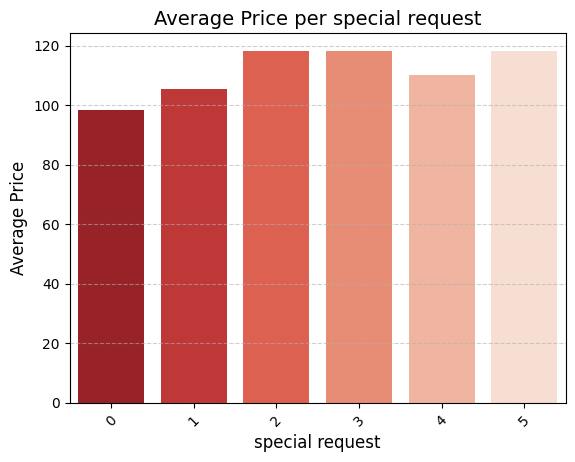

In [40]:
sns.barplot(x= special_request_prices.index, y=special_request_prices.values, palette="Reds_r")

plt.title("Average Price per special request", fontsize=14)
plt.xlabel("special request", fontsize=12)
plt.ylabel("Average Price", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

average price according to market types 

In [41]:
market_price = df.groupby('market segment type')["average price "].mean().sort_values()

C:\Users\Abdulrhman\AppData\Local\Temp\ipykernel_19884\369401824.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= market_price.index, y=market_price.values, palette="Greens_r")


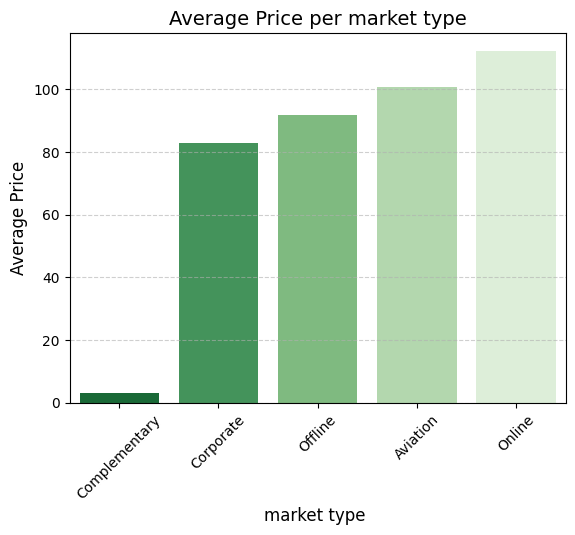

In [42]:
sns.barplot(x= market_price.index, y=market_price.values, palette="Greens_r")

plt.title("Average Price per market type", fontsize=14)
plt.xlabel("market type ", fontsize=12)
plt.ylabel("Average Price", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)


invidual vs family bookings 


In [43]:
df['customer_type'] = 'Individual/Couple'
df.loc[df['number of children'] > 0, 'customer_type'] = 'Family'

Text(0.5, 1.0, 'Distribution of Customer Types')

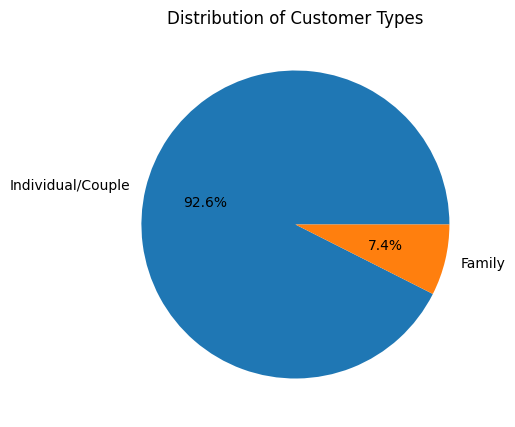

In [44]:
plt.figure(figsize=(15, 5))
customer_dist = df['customer_type'].value_counts()
plt.pie(customer_dist.values, labels=customer_dist.index, autopct='%1.1f%%')
plt.title('Distribution of Customer Types')


most of customers are new or repeated customers


In [45]:
df['customer_visit'] = 'New Customer'
df.loc[df['repeated'] > 0, 'customer_visit'] = 'Repeated Customer'


Text(0.5, 1.0, 'Distribution of Customer Types')

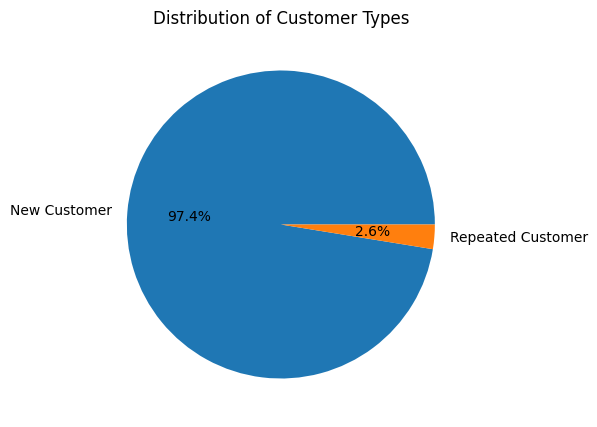

In [46]:
plt.figure(figsize=(15, 5))
customer_type = df['customer_visit'].value_counts()
plt.pie(customer_type.values, labels=customer_type.index, autopct='%1.1f%%')
plt.title('Distribution of Customer Types')


special requests according to room type 

In [47]:
room_special_requests = df.groupby("room type")["special requests"].mean()

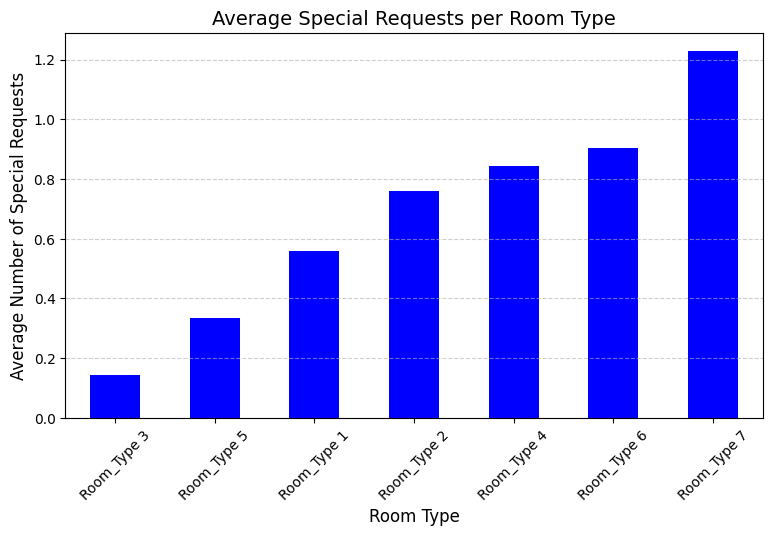

In [48]:
plt.figure(figsize=(9, 5))
room_special_requests.sort_values().plot(kind="bar", color="Blue")

plt.title("Average Special Requests per Room Type", fontsize=14)
plt.xlabel("Room Type", fontsize=12)
plt.ylabel("Average Number of Special Requests", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()


average price according to number of adults

In [49]:
adults_price = df.groupby("number of adults")["average price "].mean().sort_values()

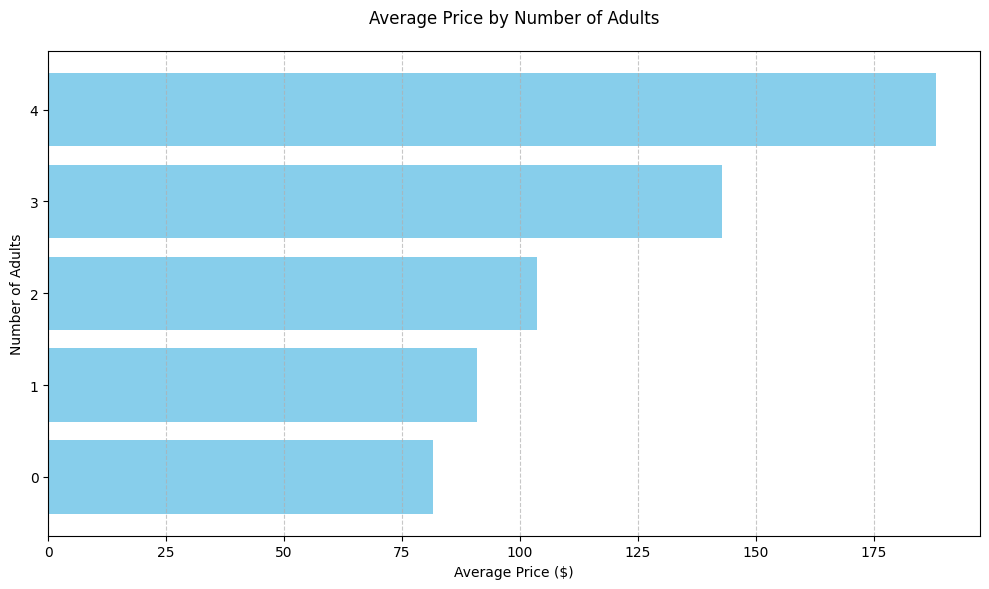

In [50]:
plt.figure(figsize=(10, 6))
plt.barh(y=adults_price.index, width=adults_price.values, color='skyblue')
plt.title('Average Price by Number of Adults', pad=20)
plt.xlabel('Average Price ($)')
plt.ylabel('Number of Adults')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

average price according to number of children (family prices)

In [51]:
family_price = df.groupby("number of children")["average price "].mean().sort_values()

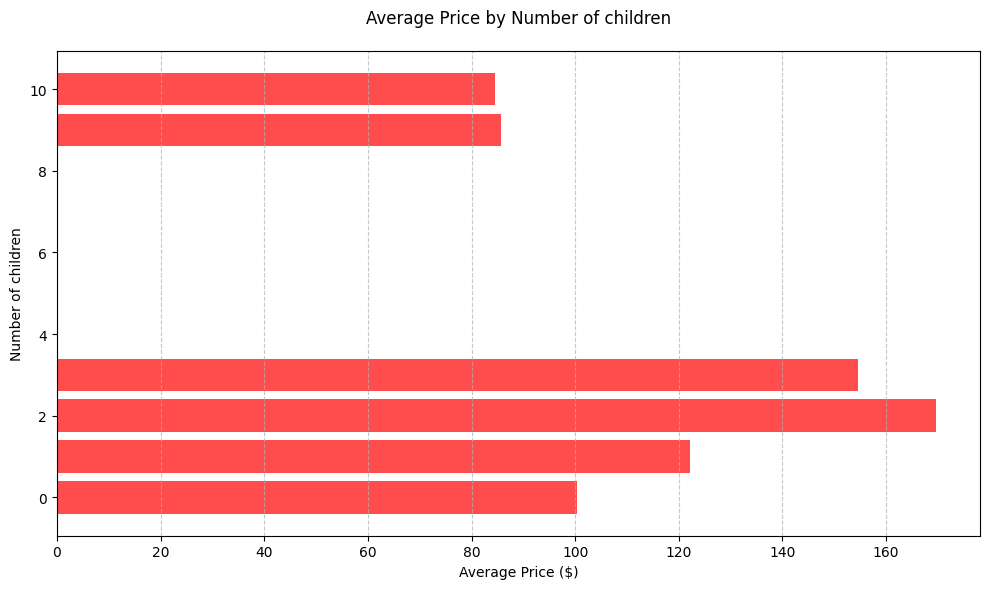

In [52]:
plt.figure(figsize=(10, 6))
plt.barh(y=family_price.index, width=family_price.values, color='#FF4D4D')
plt.title('Average Price by Number of children', pad=20)
plt.xlabel('Average Price ($)')
plt.ylabel('Number of children')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

adults only prices vs family prices 

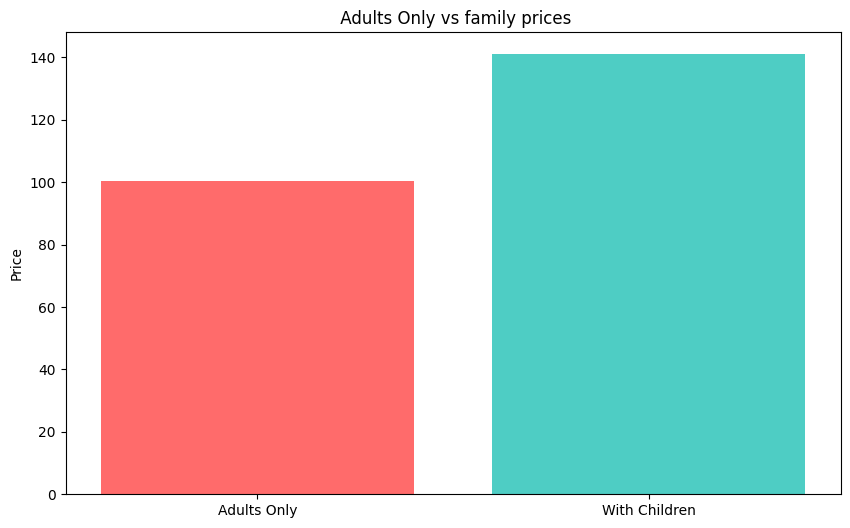

In [53]:
df['booking_type'] = 'Adults Only'
df.loc[df['number of children'] > 0, 'booking_type'] = 'With Children'
avg_prices = df.groupby('booking_type')['average price '].mean().round(2)
plt.figure(figsize=(10, 6))
plt.bar(avg_prices.index, avg_prices.values, color=['#FF6B6B', '#4ECDC4'])
plt.title(' Adults Only vs family prices')
plt.ylabel('Price')

plt.show()



does car parking availability affect cancellation 

In [54]:
car_parking_cancellation = df.groupby("car parking space")["P-C"].mean()

Text(0, 0.5, 'Average Cancellations')

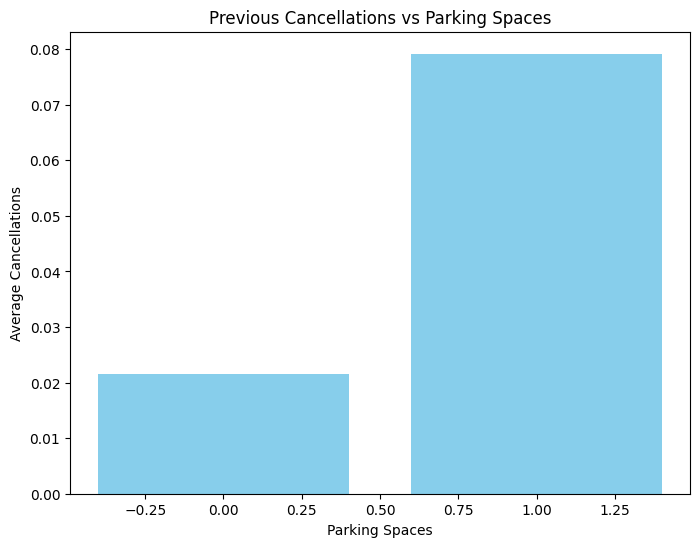

In [55]:
plt.figure(figsize=(8, 6))
plt.bar(car_parking_cancellation.index, car_parking_cancellation.values, color='skyblue')

plt.title('Previous Cancellations vs Parking Spaces')
plt.xlabel('Parking Spaces')
plt.ylabel('Average Cancellations')

previous cancellations according to the market segment way 

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Aviation'),
  Text(1, 0, 'Complementary'),
  Text(2, 0, 'Corporate'),
  Text(3, 0, 'Offline'),
  Text(4, 0, 'Online')])

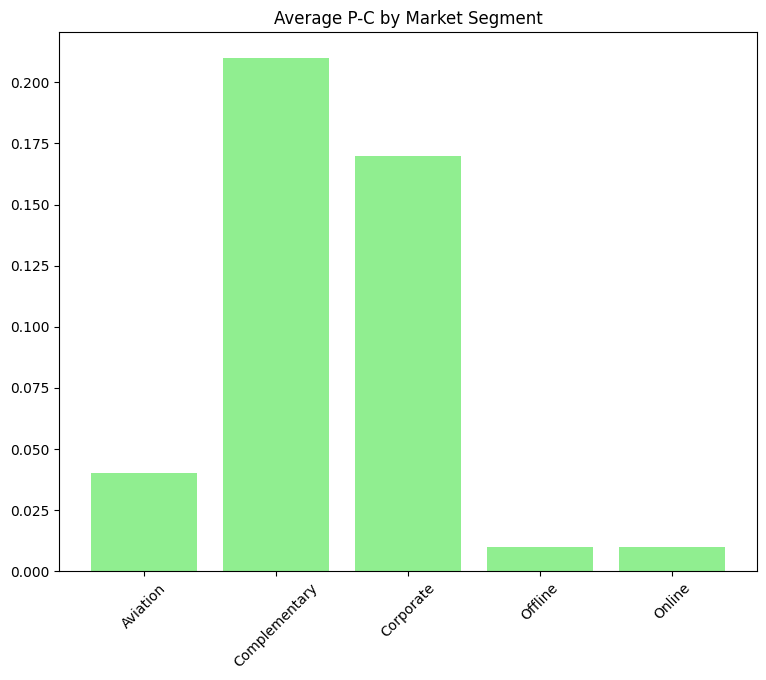

In [56]:
plt.figure(figsize=(9, 7))
market_pc = df.groupby('market segment type')['P-C'].mean().round(2)
plt.bar(market_pc.index, market_pc.values, color='lightgreen')
plt.title('Average P-C by Market Segment')
plt.xticks(rotation=45)


previous cancellations impact according to average price

Text(0, 0.5, 'Average Price')

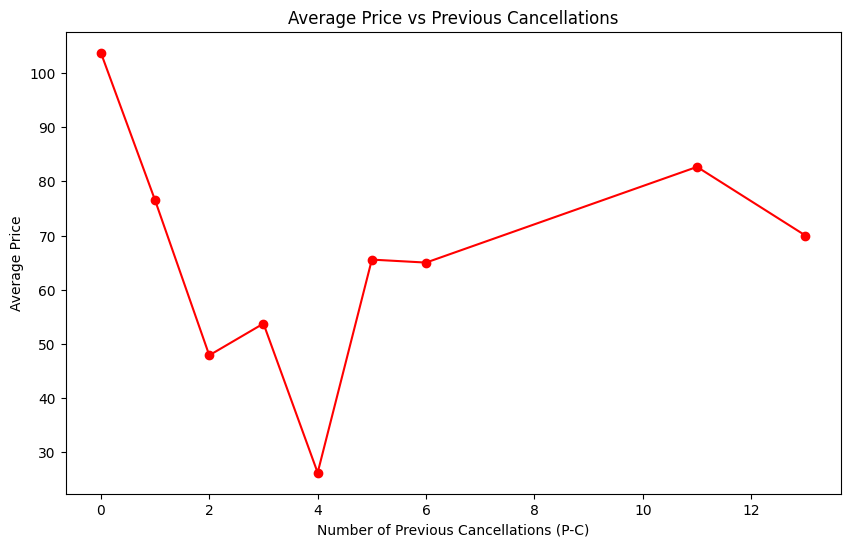

In [57]:
pc_prices = df.groupby('P-C')['average price '].mean().round(2)
plt.figure(figsize=(10, 6))
plt.plot(pc_prices.index, pc_prices.values, marker='o', color='red')
plt.title('Average Price vs Previous Cancellations')
plt.xlabel('Number of Previous Cancellations (P-C)')
plt.ylabel('Average Price')

In [58]:
df.head()

Booking_ID  number of adults  number of children  number of weekend nights  \
0   INN00001                 1                   1                         2   
1   INN00002                 1                   0                         1   
2   INN00003                 2                   1                         1   
3   INN00004                 1                   0                         0   
4   INN00005                 1                   0                         1   

   number of week nights  type of meal  car parking space    room type  \
0                      5   Meal Plan 1                  0  Room_Type 1   
1                      3  Not Selected                  0  Room_Type 1   
2                      3   Meal Plan 1                  0  Room_Type 1   
3                      2   Meal Plan 1                  0  Room_Type 1   
4                      2  Not Selected                  0  Room_Type 1   

   lead time market segment type  ...  special requests  date of reservation  \
0        224             Offline  ...                 0           2015-10-02   
1          5              Online  ...                 1           2018-11-06   
2          1              Online  ...                 0           2018-02-28   
3        211              Online  ...                 1           2017-05-20   
4         48              Online  ...                 0           2018-04-11   

   booking status       days    months     month lead_time_category  \
0    Not_Canceled     Friday   October   October          180+ days   
1    Not_Canceled    Tuesday  November  November           0-7 days   
2        Canceled  Wednesday  February  February           0-7 days   
3        Canceled   Saturday       May       May          180+ days   
4        Canceled  Wednesday     April     April         31-90 days   

       customer_type customer_visit   booking_type  
0             Family   New Customer  With Children  
1  Individual/Couple   New Customer    Adults Only  
2             Family   New Customer  With Children  
3  Individual/Couple   New Customer    Adults Only  
4  Individual/Couple   New Customer    Adults Only  

[5 rows x 24 columns]

In [59]:
df.drop(['days', 'months', 'month','lead_time_category','customer_visit','customer_type','booking_type'], axis='columns', inplace=True)

In [ ]:
df.head()

Booking_ID  number of adults  number of children  number of weekend nights  \
0   INN00001                 1                   1                         2   
1   INN00002                 1                   0                         1   
2   INN00003                 2                   1                         1   
3   INN00004                 1                   0                         0   
4   INN00005                 1                   0                         1   

   number of week nights  type of meal  car parking space    room type  \
0                      5   Meal Plan 1                  0  Room_Type 1   
1                      3  Not Selected                  0  Room_Type 1   
2                      3   Meal Plan 1                  0  Room_Type 1   
3                      2   Meal Plan 1                  0  Room_Type 1   
4                      2  Not Selected                  0  Room_Type 1   

   lead time market segment type  repeated  P-C  P-not-C  average price   \
0        224             Offline         0    0        0           88.00   
1          5              Online         0    0        0          106.68   
2          1              Online         0    0        0           50.00   
3        211              Online         0    0        0          100.00   
4         48              Online         0    0        0           77.00   

   special requests date of reservation booking status  
0                 0          2015-10-02   Not_Canceled  
1                 1          2018-11-06   Not_Canceled  
2                 0          2018-02-28       Canceled  
3                 1          2017-05-20       Canceled  
4                 0          2018-04-11       Canceled

In [61]:
df.shape

(36285, 17)

In [62]:
df['date_of_reservation'] = pd.to_datetime(df['date of reservation'])

# Then extract useful features
df['reservation_year'] = df['date_of_reservation'].dt.year
df['reservation_month'] = df['date_of_reservation'].dt.month
df['reservation_day'] = df['date_of_reservation'].dt.day
df['reservation_dayofweek'] = df['date_of_reservation'].dt.dayofweek

In [ ]:
df.head()

Booking_ID  number of adults  number of children  number of weekend nights  \
0   INN00001                 1                   1                         2   
1   INN00002                 1                   0                         1   
2   INN00003                 2                   1                         1   
3   INN00004                 1                   0                         0   
4   INN00005                 1                   0                         1   

   number of week nights  type of meal  car parking space    room type  \
0                      5   Meal Plan 1                  0  Room_Type 1   
1                      3  Not Selected                  0  Room_Type 1   
2                      3   Meal Plan 1                  0  Room_Type 1   
3                      2   Meal Plan 1                  0  Room_Type 1   
4                      2  Not Selected                  0  Room_Type 1   

   lead time market segment type  ...  P-not-C  average price   \
0        224             Offline  ...        0           88.00   
1          5              Online  ...        0          106.68   
2          1              Online  ...        0           50.00   
3        211              Online  ...        0          100.00   
4         48              Online  ...        0           77.00   

   special requests  date of reservation  booking status date_of_reservation  \
0                 0           2015-10-02    Not_Canceled          2015-10-02   
1                 1           2018-11-06    Not_Canceled          2018-11-06   
2                 0           2018-02-28        Canceled          2018-02-28   
3                 1           2017-05-20        Canceled          2017-05-20   
4                 0           2018-04-11        Canceled          2018-04-11   

  reservation_year reservation_month  reservation_day  reservation_dayofweek  
0           2015.0              10.0              2.0                    4.0  
1           2018.0              11.0              6.0                    1.0  
2           2018.0               2.0             28.0                    2.0  
3           2017.0               5.0             20.0                    5.0  
4           2018.0               4.0             11.0                    2.0  

[5 rows x 22 columns]

In [64]:
df.drop('date_of_reservation', axis="columns", inplace=True)

In [65]:
df.head(5)

Booking_ID  number of adults  number of children  number of weekend nights  \
0   INN00001                 1                   1                         2   
1   INN00002                 1                   0                         1   
2   INN00003                 2                   1                         1   
3   INN00004                 1                   0                         0   
4   INN00005                 1                   0                         1   

   number of week nights  type of meal  car parking space    room type  \
0                      5   Meal Plan 1                  0  Room_Type 1   
1                      3  Not Selected                  0  Room_Type 1   
2                      3   Meal Plan 1                  0  Room_Type 1   
3                      2   Meal Plan 1                  0  Room_Type 1   
4                      2  Not Selected                  0  Room_Type 1   

   lead time market segment type  ...  P-C  P-not-C  average price   \
0        224             Offline  ...    0        0           88.00   
1          5              Online  ...    0        0          106.68   
2          1              Online  ...    0        0           50.00   
3        211              Online  ...    0        0          100.00   
4         48              Online  ...    0        0           77.00   

   special requests  date of reservation booking status reservation_year  \
0                 0           2015-10-02   Not_Canceled           2015.0   
1                 1           2018-11-06   Not_Canceled           2018.0   
2                 0           2018-02-28       Canceled           2018.0   
3                 1           2017-05-20       Canceled           2017.0   
4                 0           2018-04-11       Canceled           2018.0   

   reservation_month  reservation_day  reservation_dayofweek  
0               10.0              2.0                    4.0  
1               11.0              6.0                    1.0  
2                2.0             28.0                    2.0  
3                5.0             20.0                    5.0  
4                4.0             11.0                    2.0  

[5 rows x 21 columns]

one hot for categorical 

In [66]:
categorical_cols = ['type of meal', 'room type', 'market segment type']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df_encoded.head(5)



Booking_ID  number of adults  number of children  number of weekend nights  \
0   INN00001                 1                   1                         2   
1   INN00002                 1                   0                         1   
2   INN00003                 2                   1                         1   
3   INN00004                 1                   0                         0   
4   INN00005                 1                   0                         1   

   number of week nights  car parking space  lead time  repeated  P-C  \
0                      5                  0        224         0    0   
1                      3                  0          5         0    0   
2                      3                  0          1         0    0   
3                      2                  0        211         0    0   
4                      2                  0         48         0    0   

   P-not-C  ...  room type_Room_Type 2  room type_Room_Type 3  \
0        0  ...                  False                  False   
1        0  ...                  False                  False   
2        0  ...                  False                  False   
3        0  ...                  False                  False   
4        0  ...                  False                  False   

  room type_Room_Type 4 room type_Room_Type 5  room type_Room_Type 6  \
0                 False                 False                  False   
1                 False                 False                  False   
2                 False                 False                  False   
3                 False                 False                  False   
4                 False                 False                  False   

   room type_Room_Type 7  market segment type_Complementary  \
0                  False                              False   
1                  False                              False   
2                  False                              False   
3                  False                              False   
4                  False                              False   

   market segment type_Corporate  market segment type_Offline  \
0                          False                         True   
1                          False                        False   
2                          False                        False   
3                          False                        False   
4                          False                        False   

   market segment type_Online  
0                       False  
1                        True  
2                        True  
3                        True  
4                        True  

[5 rows x 31 columns]

In [67]:
df_encoded.columns

Index(['Booking_ID', 'number of adults', 'number of children',
       'number of weekend nights', 'number of week nights',
       'car parking space', 'lead time', 'repeated', 'P-C', 'P-not-C',
       'average price ', 'special requests', 'date of reservation',
       'booking status', 'reservation_year', 'reservation_month',
       'reservation_day', 'reservation_dayofweek', 'type of meal_Meal Plan 2',
       'type of meal_Meal Plan 3', 'type of meal_Not Selected',
       'room type_Room_Type 2', 'room type_Room_Type 3',
       'room type_Room_Type 4', 'room type_Room_Type 5',
       'room type_Room_Type 6', 'room type_Room_Type 7',
       'market segment type_Complementary', 'market segment type_Corporate',
       'market segment type_Offline', 'market segment type_Online'],
      dtype='object')

In [68]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_encoded['booking status'] = le.fit_transform(df_encoded['booking status'])

In [69]:
df_encoded["booking status"]

0        1
1        1
2        0
3        0
4        0
        ..
36280    0
36281    1
36282    1
36283    1
36284    1
Name: booking status, Length: 36285, dtype: int32

In [70]:
df_encoded.columns

Index(['Booking_ID', 'number of adults', 'number of children',
       'number of weekend nights', 'number of week nights',
       'car parking space', 'lead time', 'repeated', 'P-C', 'P-not-C',
       'average price ', 'special requests', 'date of reservation',
       'booking status', 'reservation_year', 'reservation_month',
       'reservation_day', 'reservation_dayofweek', 'type of meal_Meal Plan 2',
       'type of meal_Meal Plan 3', 'type of meal_Not Selected',
       'room type_Room_Type 2', 'room type_Room_Type 3',
       'room type_Room_Type 4', 'room type_Room_Type 5',
       'room type_Room_Type 6', 'room type_Room_Type 7',
       'market segment type_Complementary', 'market segment type_Corporate',
       'market segment type_Offline', 'market segment type_Online'],
      dtype='object')

In [71]:
df_encoded1=df_encoded.drop('Booking_ID', axis="columns")
df_encoded1.head()

number of adults  number of children  number of weekend nights  \
0                 1                   1                         2   
1                 1                   0                         1   
2                 2                   1                         1   
3                 1                   0                         0   
4                 1                   0                         1   

   number of week nights  car parking space  lead time  repeated  P-C  \
0                      5                  0        224         0    0   
1                      3                  0          5         0    0   
2                      3                  0          1         0    0   
3                      2                  0        211         0    0   
4                      2                  0         48         0    0   

   P-not-C  average price   ...  room type_Room_Type 2 room type_Room_Type 3  \
0        0           88.00  ...                  False                 False   
1        0          106.68  ...                  False                 False   
2        0           50.00  ...                  False                 False   
3        0          100.00  ...                  False                 False   
4        0           77.00  ...                  False                 False   

   room type_Room_Type 4  room type_Room_Type 5  room type_Room_Type 6  \
0                  False                  False                  False   
1                  False                  False                  False   
2                  False                  False                  False   
3                  False                  False                  False   
4                  False                  False                  False   

   room type_Room_Type 7  market segment type_Complementary  \
0                  False                              False   
1                  False                              False   
2                  False                              False   
3                  False                              False   
4                  False                              False   

   market segment type_Corporate  market segment type_Offline  \
0                          False                         True   
1                          False                        False   
2                          False                        False   
3                          False                        False   
4                          False                        False   

   market segment type_Online  
0                       False  
1                        True  
2                        True  
3                        True  
4                        True  

[5 rows x 30 columns]

In [72]:
df_encoded1.columns

Index(['number of adults', 'number of children', 'number of weekend nights',
       'number of week nights', 'car parking space', 'lead time', 'repeated',
       'P-C', 'P-not-C', 'average price ', 'special requests',
       'date of reservation', 'booking status', 'reservation_year',
       'reservation_month', 'reservation_day', 'reservation_dayofweek',
       'type of meal_Meal Plan 2', 'type of meal_Meal Plan 3',
       'type of meal_Not Selected', 'room type_Room_Type 2',
       'room type_Room_Type 3', 'room type_Room_Type 4',
       'room type_Room_Type 5', 'room type_Room_Type 6',
       'room type_Room_Type 7', 'market segment type_Complementary',
       'market segment type_Corporate', 'market segment type_Offline',
       'market segment type_Online'],
      dtype='object')

check outliers 

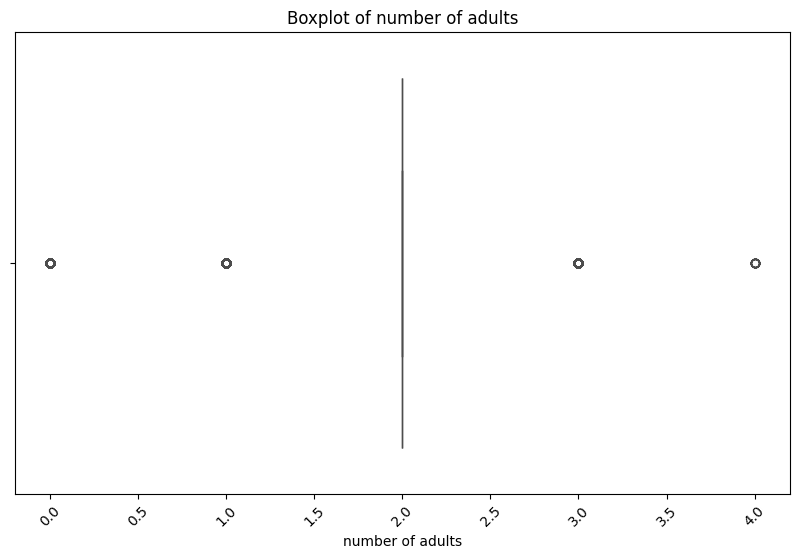

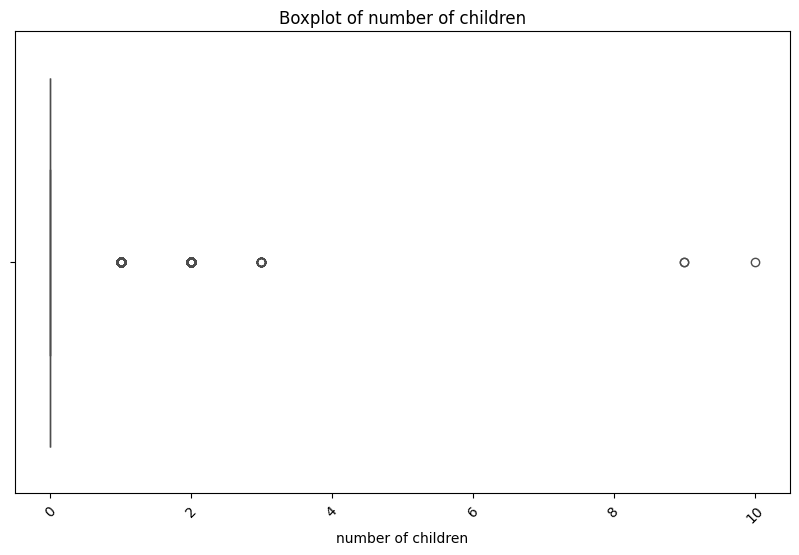

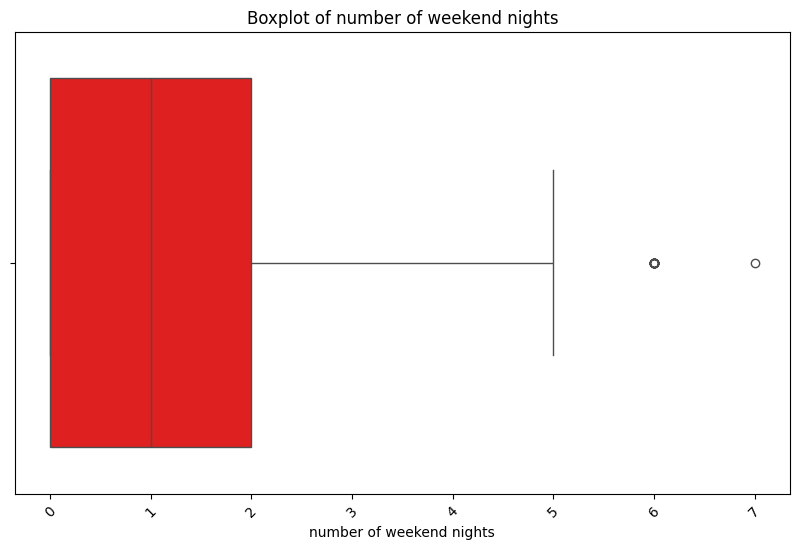

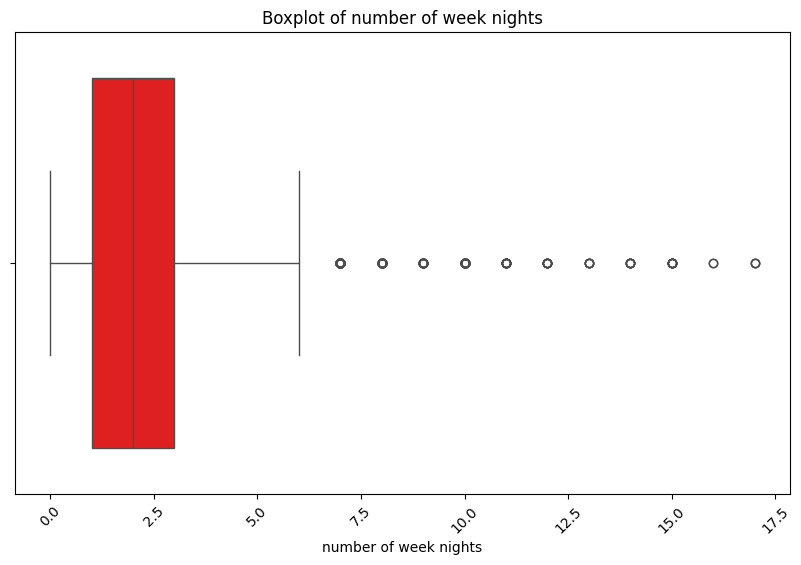

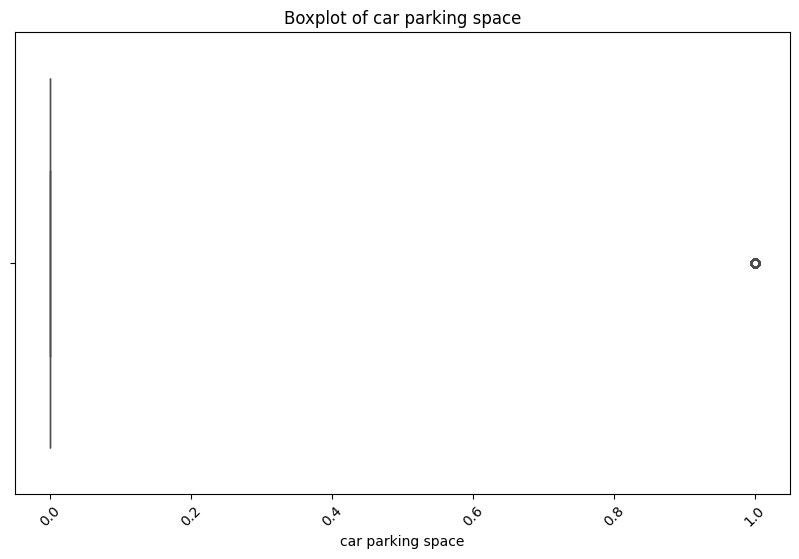

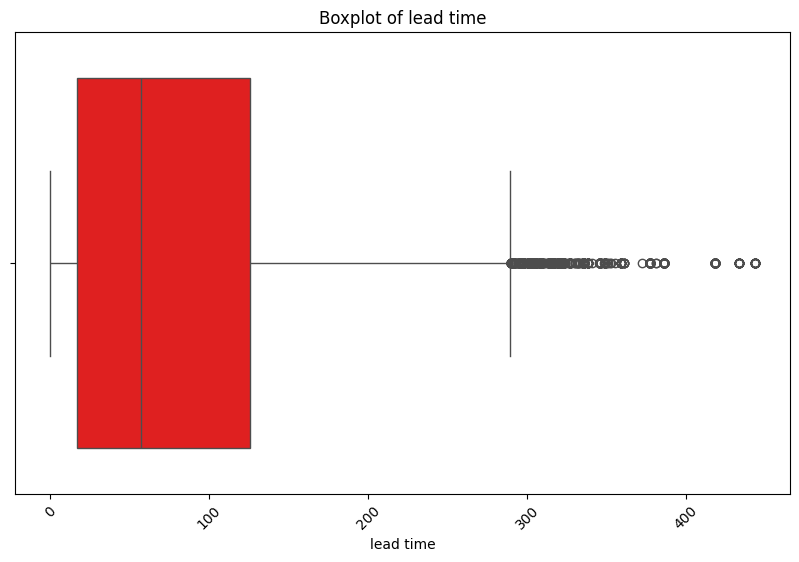

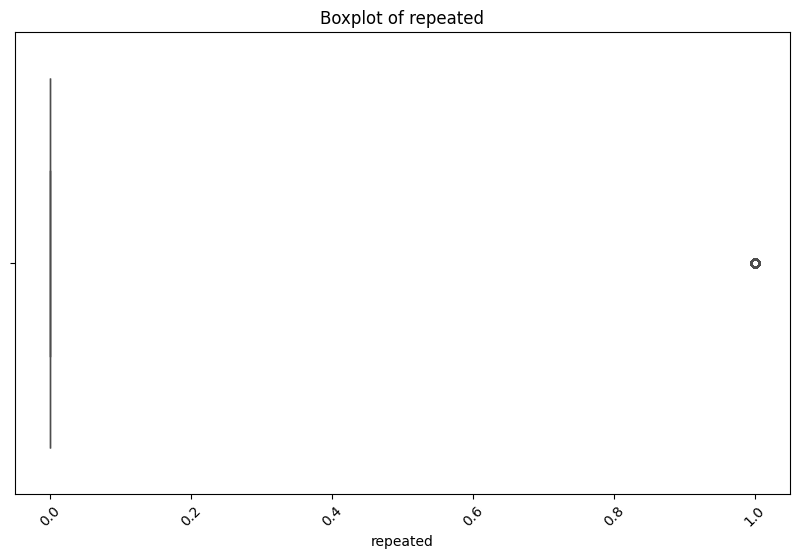

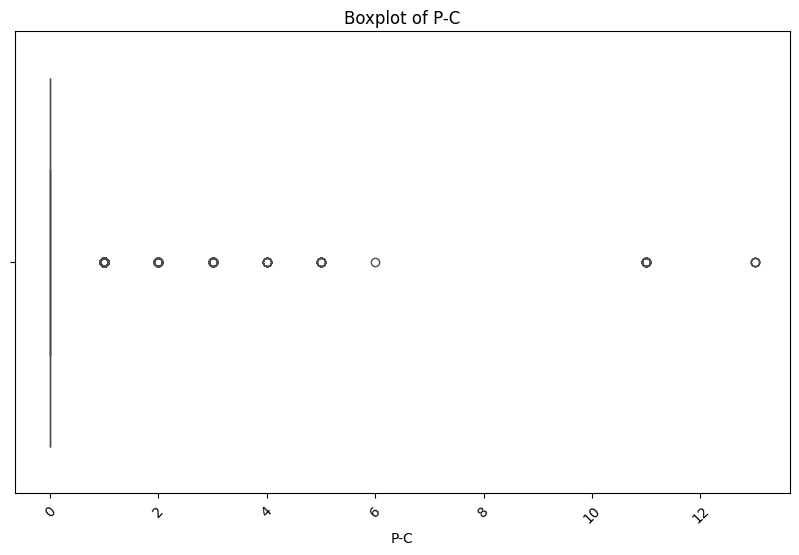

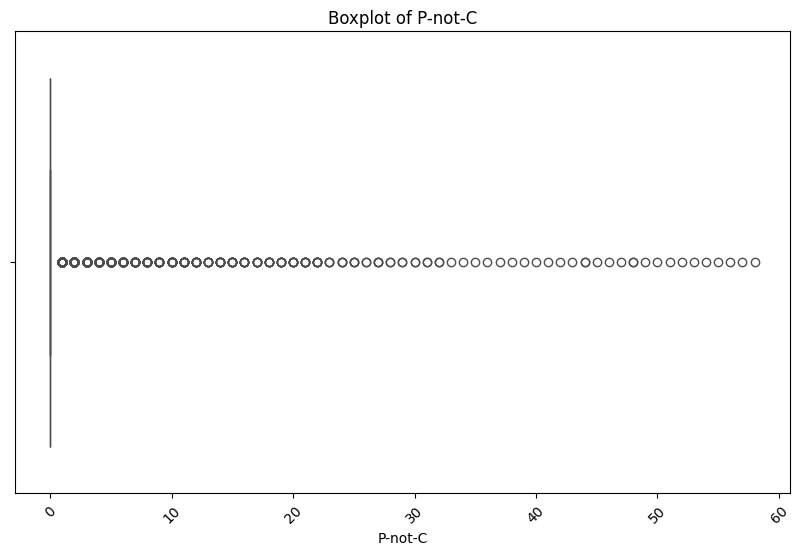

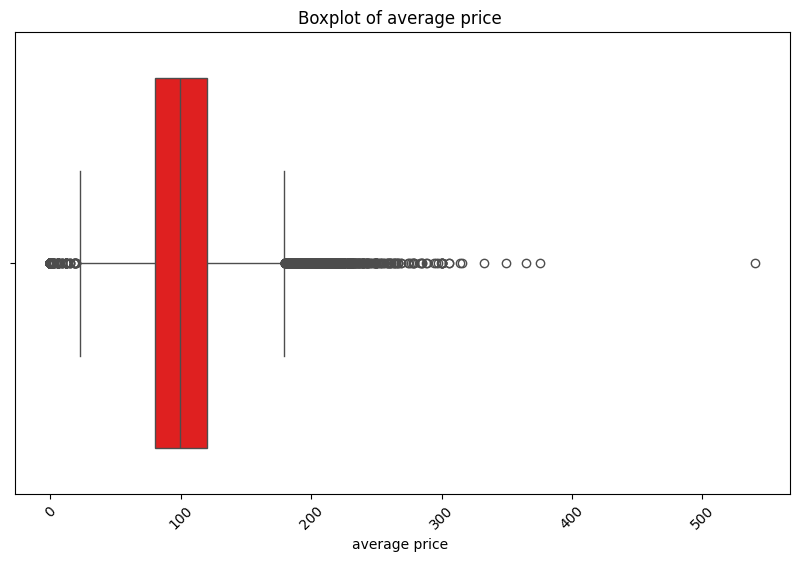

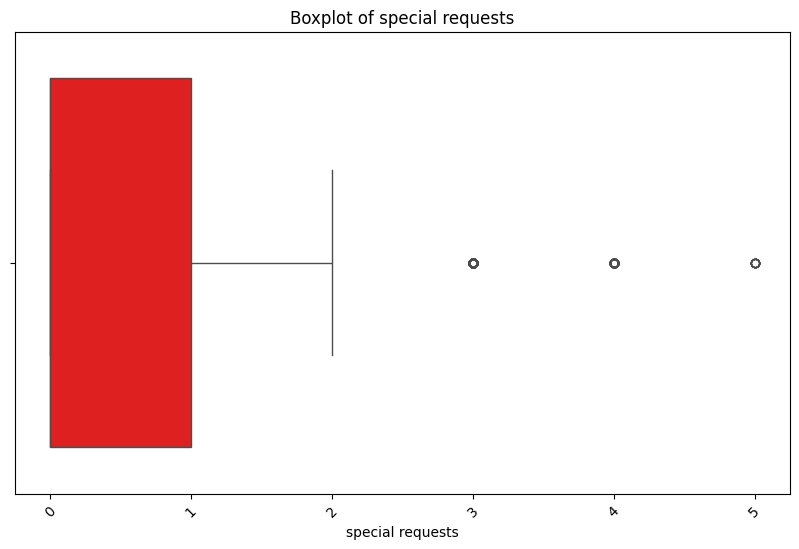

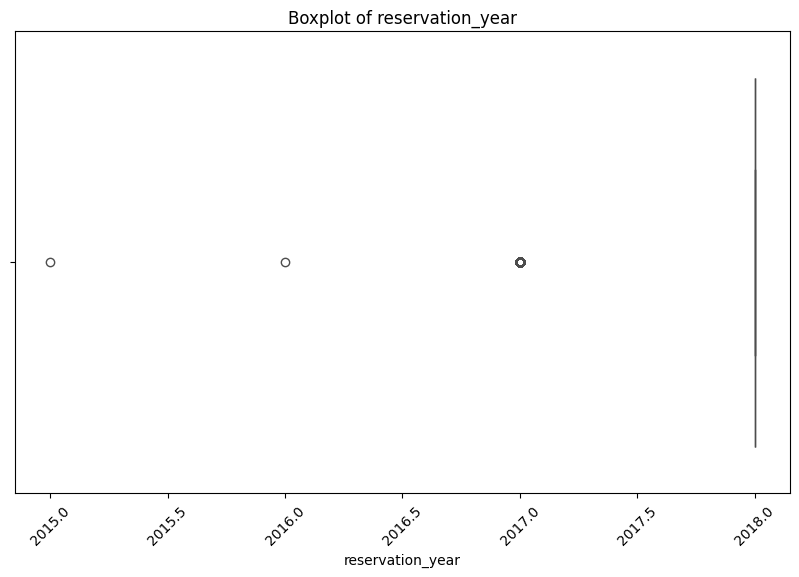

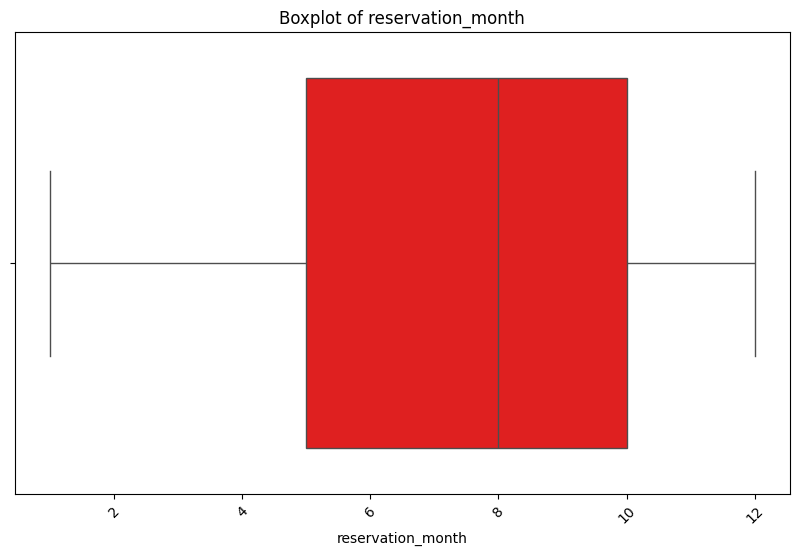

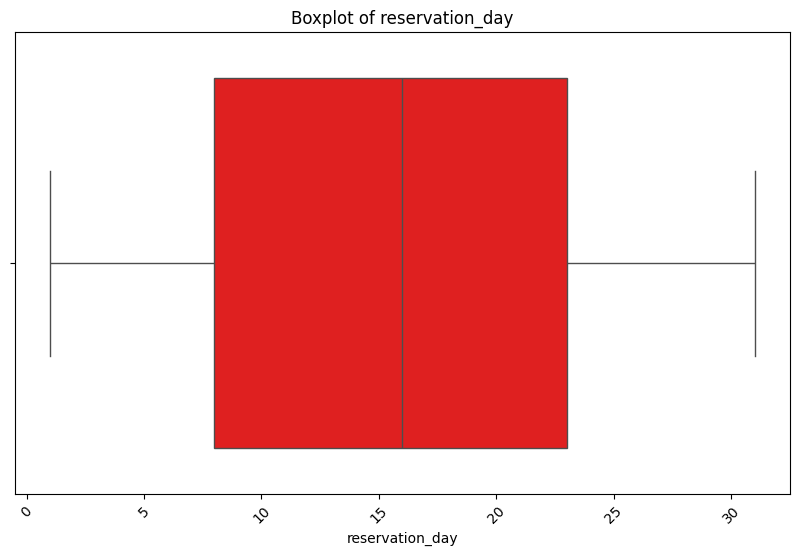

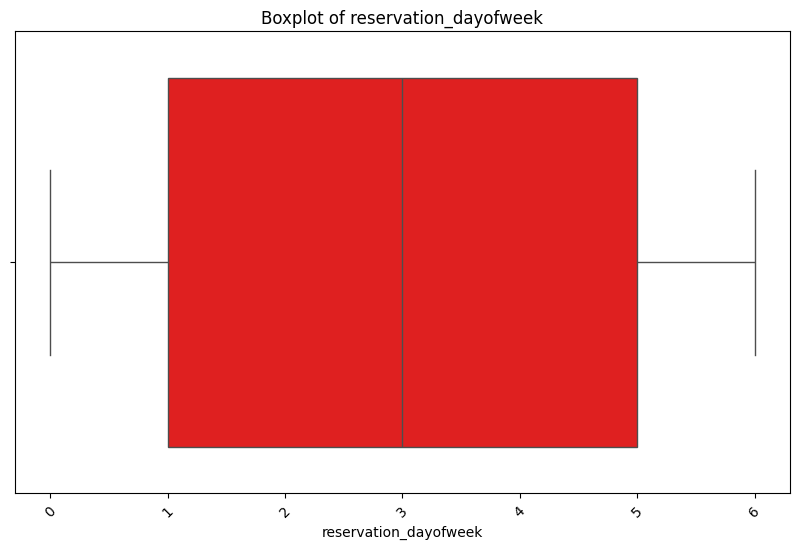

In [73]:
numeric_cols = df_encoded1.select_dtypes(include=['int64', 'float64']).columns

# Create boxplot for each numeric column

for column in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_encoded1[column], color='red')
    plt.title(f'Boxplot of {column}')
    plt.xticks(rotation=45)
    plt.show()

In [74]:
# Create a copy of original dataframe
df_removed_outliers = df_encoded.copy()

# For number of week nights
Q1_nights = df_removed_outliers['number of week nights'].quantile(0.25)
Q3_nights = df_removed_outliers['number of week nights'].quantile(0.75)
IQR_nights = Q3_nights - Q1_nights
upper_bound_nights = Q3_nights + 1.5 * IQR_nights
lower_bound_nights = Q1_nights - 1.5 * IQR_nights

# For average price
Q1_price = df_removed_outliers['average price '].quantile(0.25)
Q3_price = df_removed_outliers['average price '].quantile(0.75)
IQR_price = Q3_price - Q1_price
upper_bound_price = Q3_price + 1.5 * IQR_price
lower_bound_price = Q1_price - 1.5 * IQR_price

# For P-not-C
Q1_pnc = df_removed_outliers['P-not-C'].quantile(0.25)
Q3_pnc = df_removed_outliers['P-not-C'].quantile(0.75)
IQR_pnc = Q3_pnc - Q1_pnc
upper_bound_pnc = Q3_pnc + 1.5 * IQR_pnc
lower_bound_pnc = Q1_pnc - 1.5 * IQR_pnc

# Remove outliers (this will actually remove rows)
df_removed_outliers = df_removed_outliers[
    (df_removed_outliers['number of week nights'] >= lower_bound_nights) & 
    (df_removed_outliers['number of week nights'] <= upper_bound_nights) &
    (df_removed_outliers['average price '] >= lower_bound_price) & 
    (df_removed_outliers['average price '] <= upper_bound_price) &
    (df_removed_outliers['P-not-C'] >= lower_bound_pnc) & 
    (df_removed_outliers['P-not-C'] <= upper_bound_pnc)
]

# Compare rows
print("Original DataFrame rows:", len(df_encoded))
print("DataFrame with removed outliers:", len(df_removed_outliers))

Original DataFrame rows: 36285
DataFrame with removed outliers: 33601


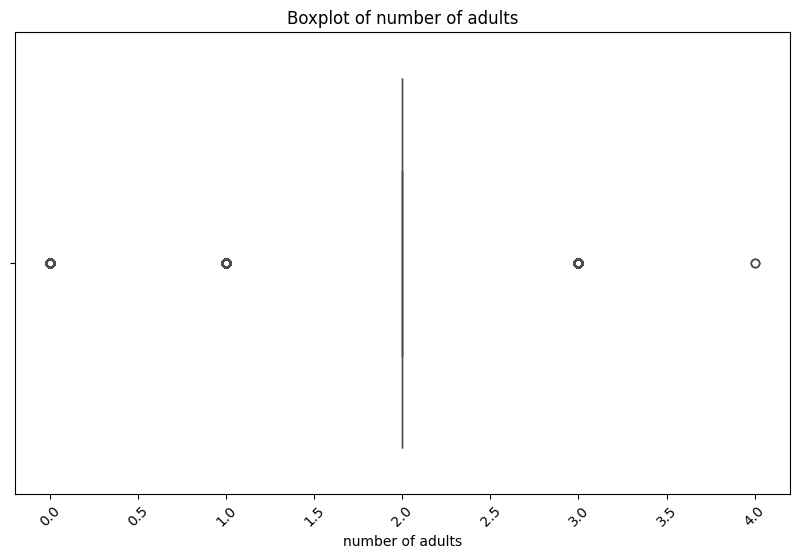

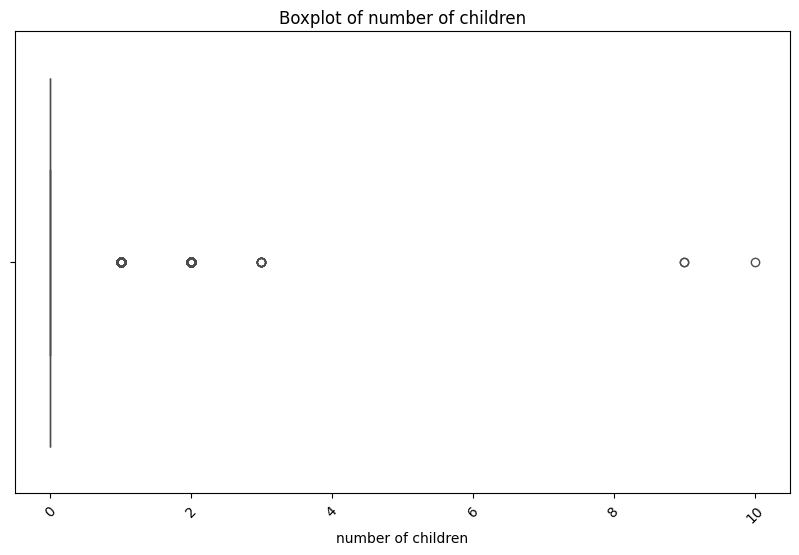

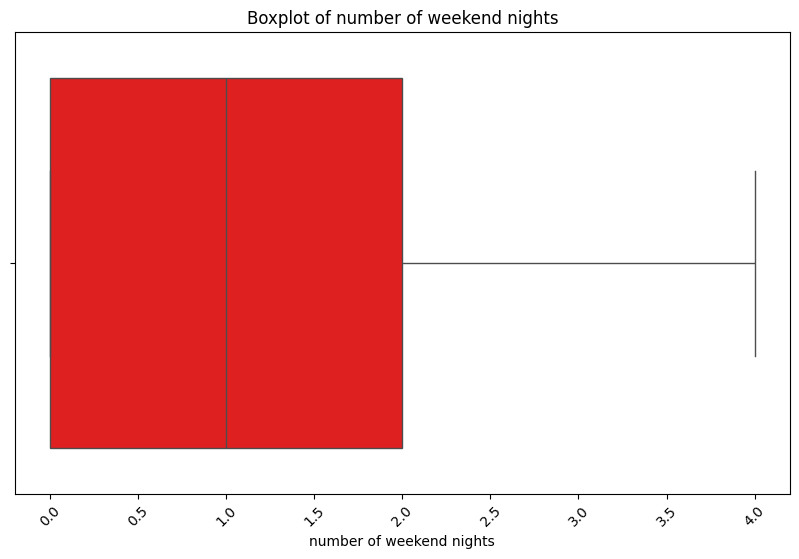

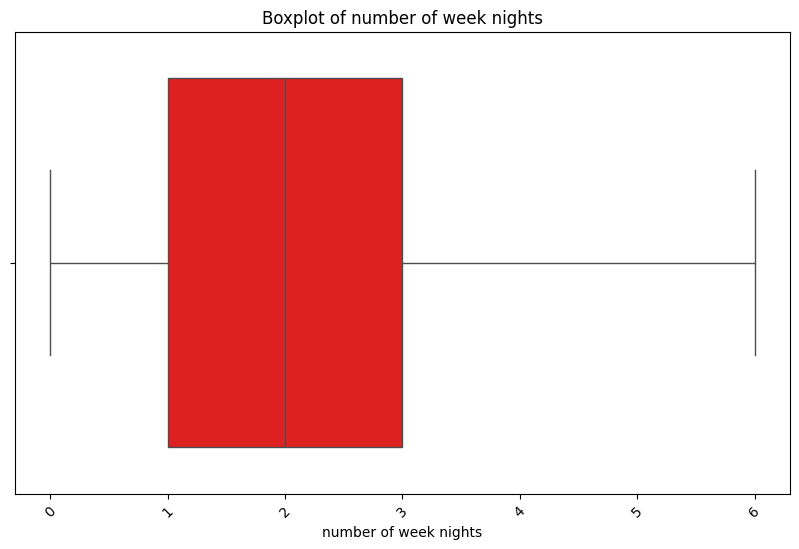

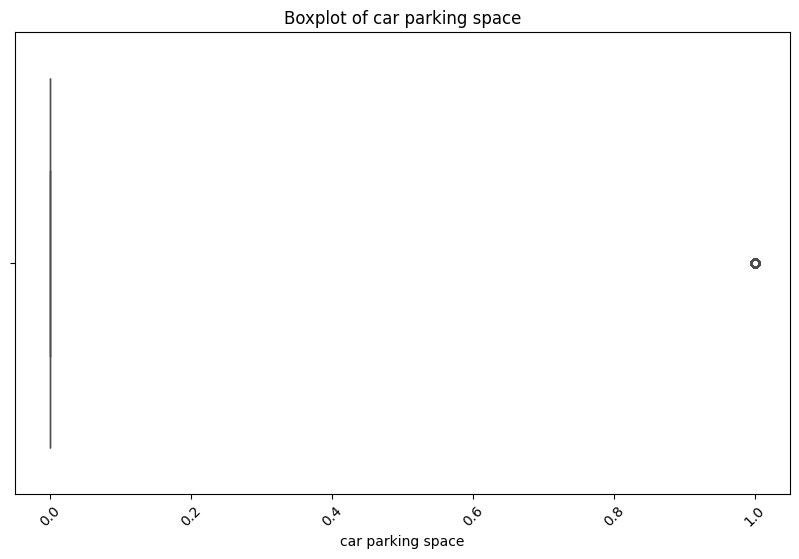

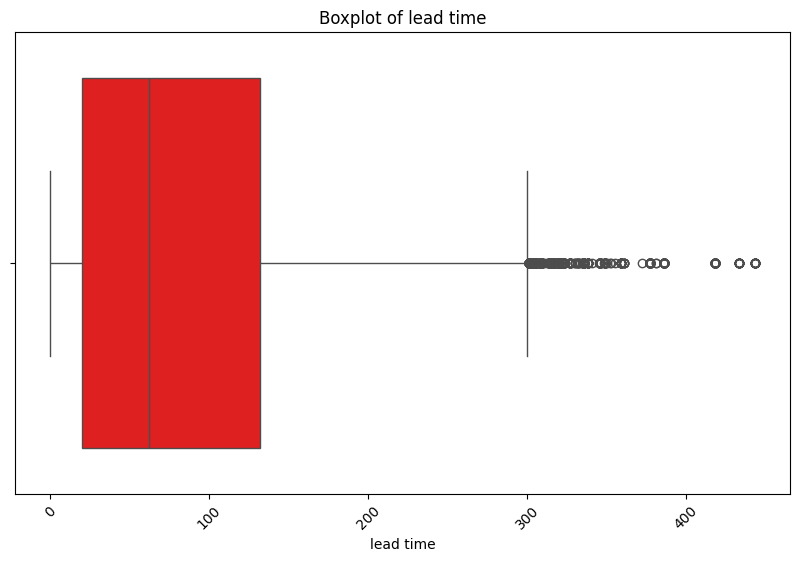

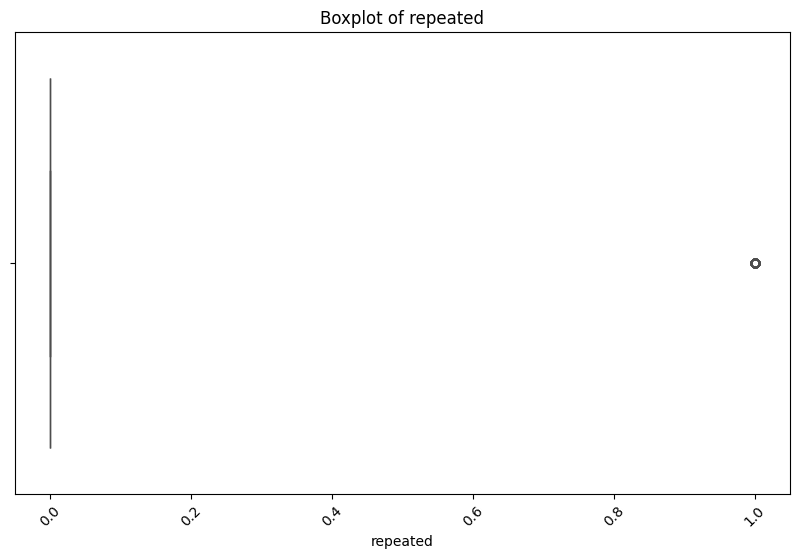

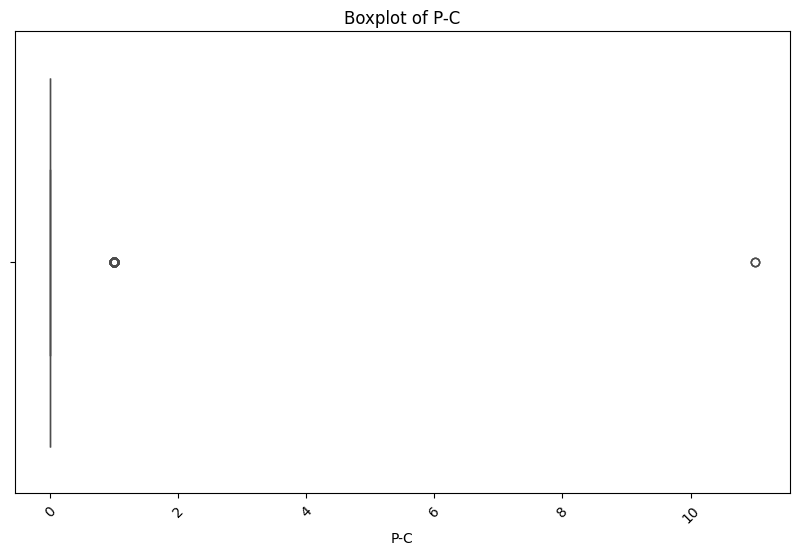

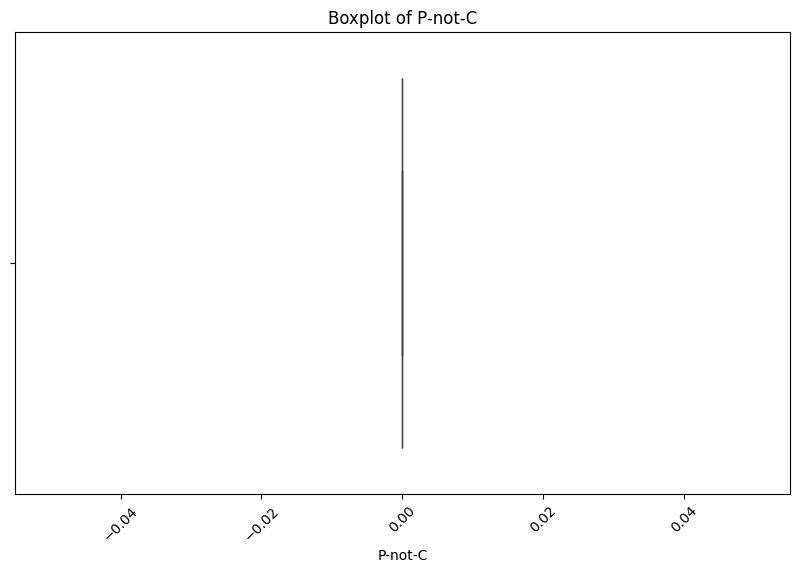

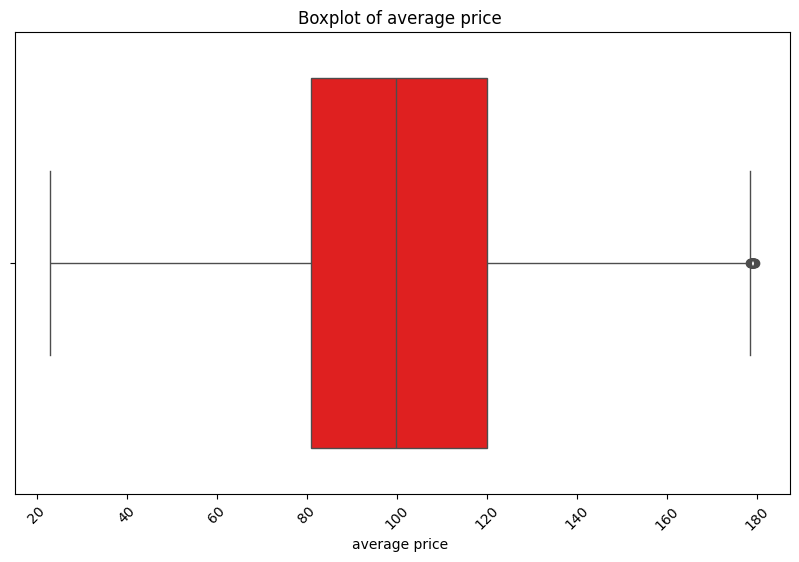

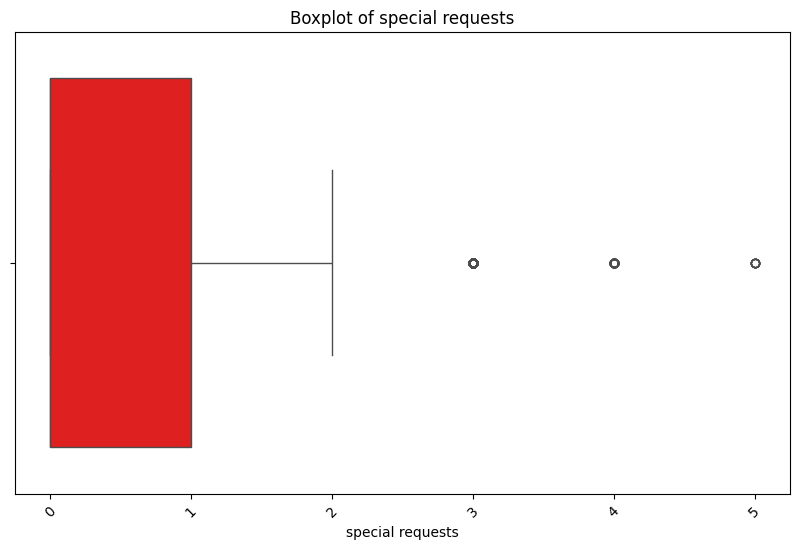

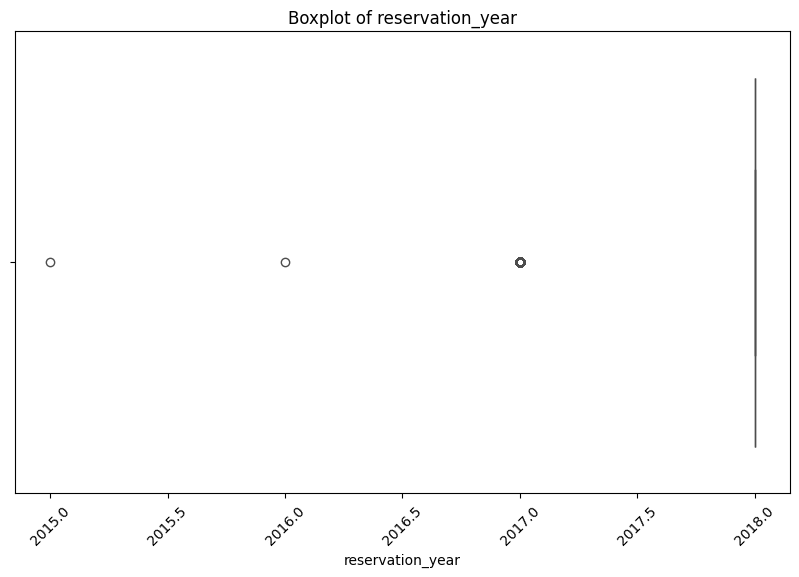

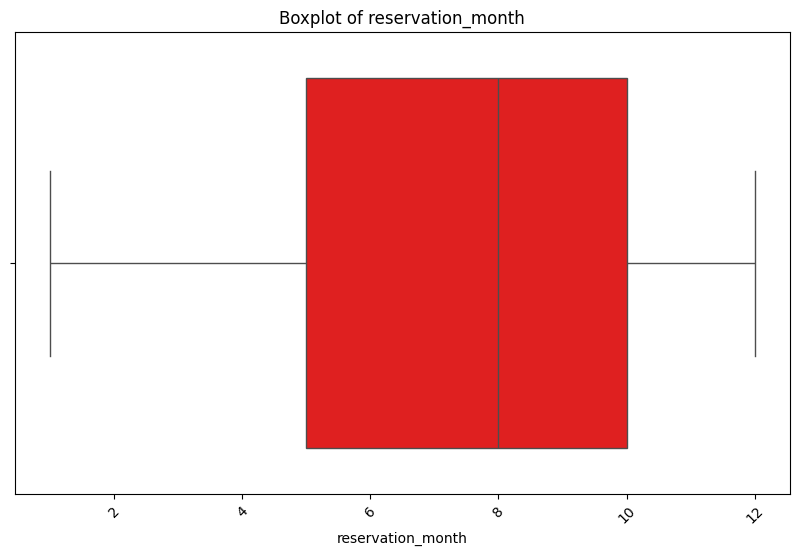

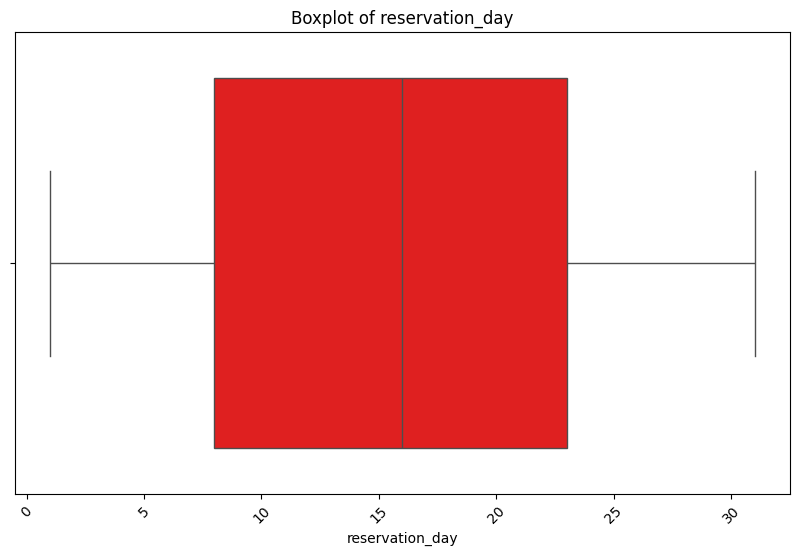

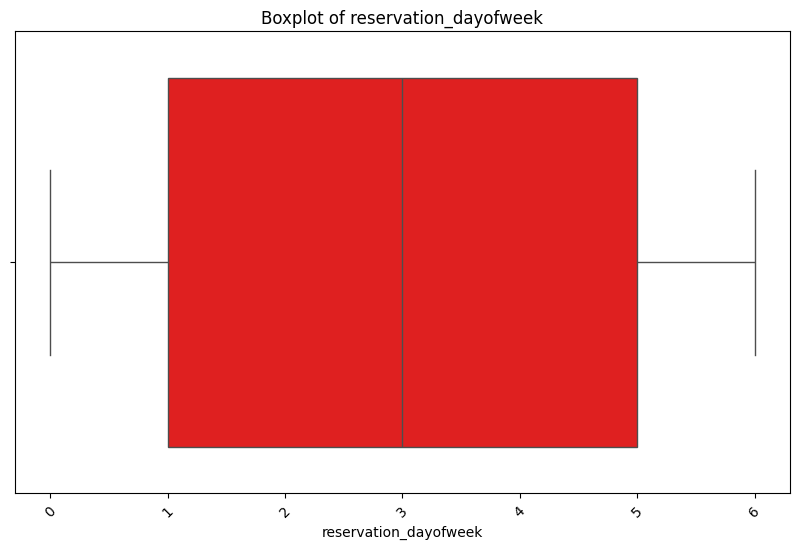

In [75]:
numeric_cols = df_removed_outliers.select_dtypes(include=['int64', 'float64']).columns

# Create boxplot for each numeric column

for column in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_removed_outliers[column], color='red')
    plt.title(f'Boxplot of {column}')
    plt.xticks(rotation=45)
    plt.show()

In [76]:

Q1_lead = df_removed_outliers['lead time'].quantile(0.25)
Q3_lead = df_removed_outliers['lead time'].quantile(0.75)
IQR_lead = Q3_lead - Q1_lead
upper_bound_lead = Q3_lead + 1.5 * IQR_lead
lower_bound_lead = Q1_lead - 1.5 * IQR_lead

df_removed_outliers = df_removed_outliers[
    (df_removed_outliers['lead time'] >= lower_bound_lead) & 
    (df_removed_outliers['lead time'] <= upper_bound_lead)
]

print("Rows before removing lead time outliers:", len(df_encoded))
print("Rows after removing lead time outliers:", len(df_removed_outliers))


Rows before removing lead time outliers: 36285
Rows after removing lead time outliers: 32494


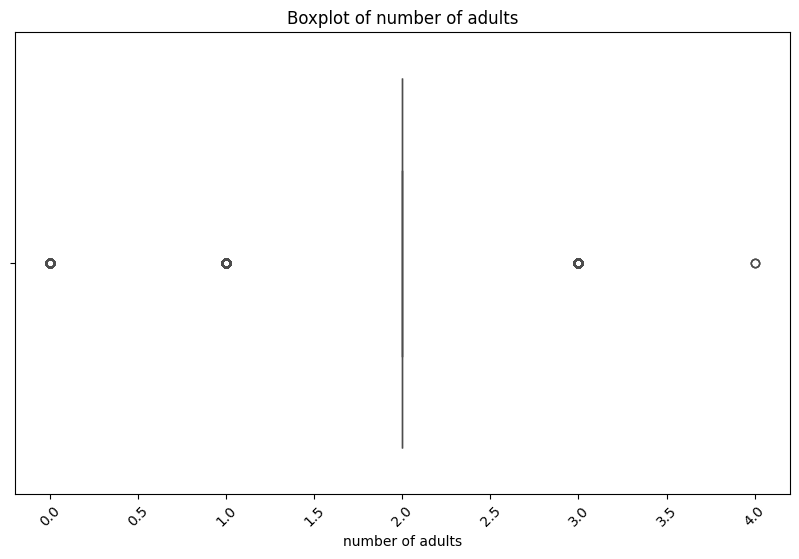

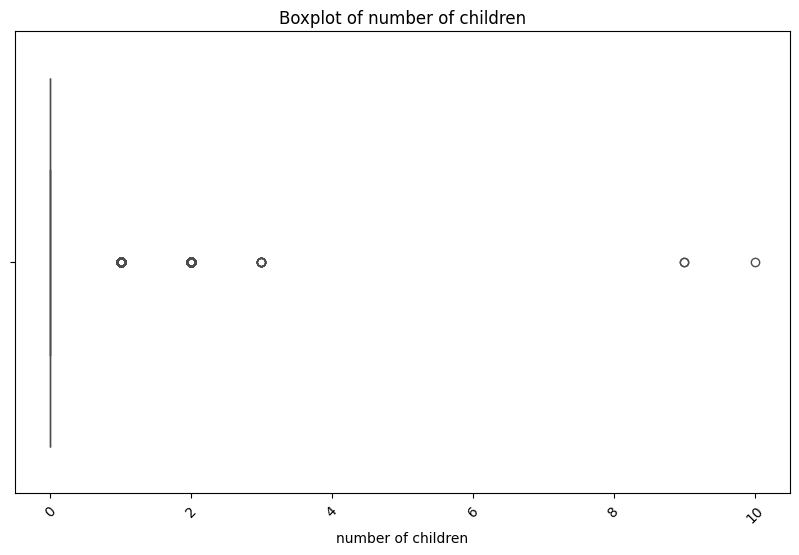

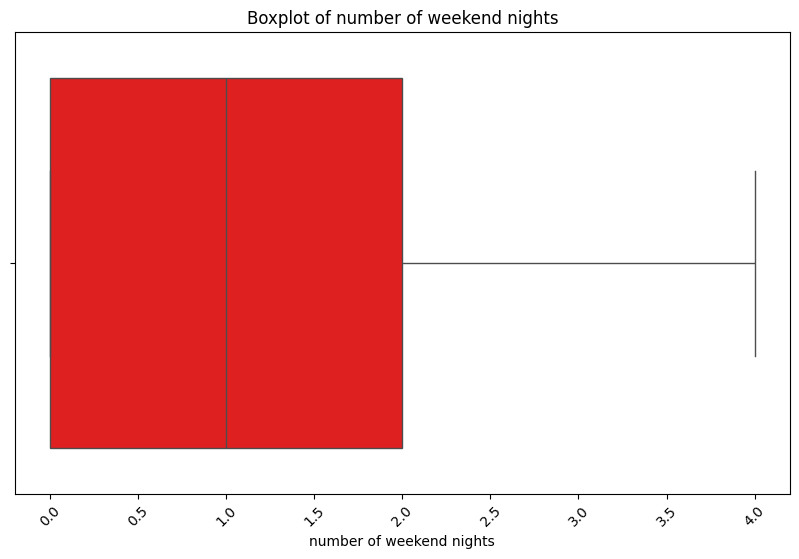

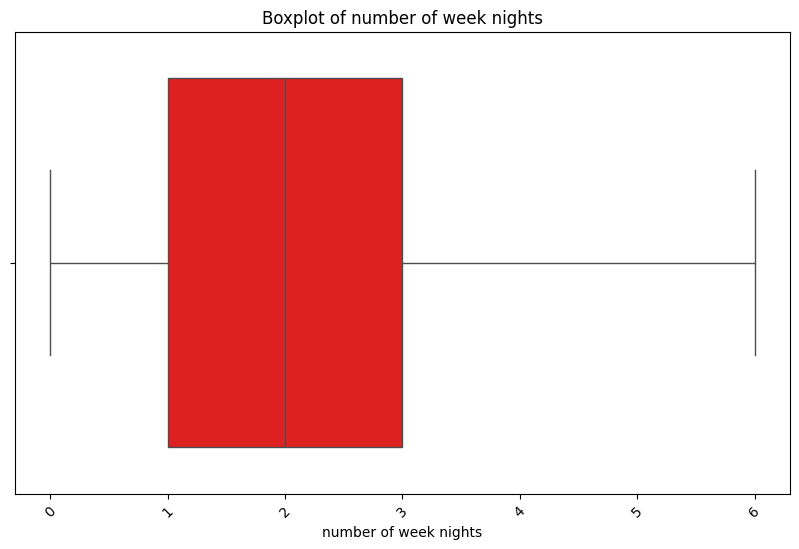

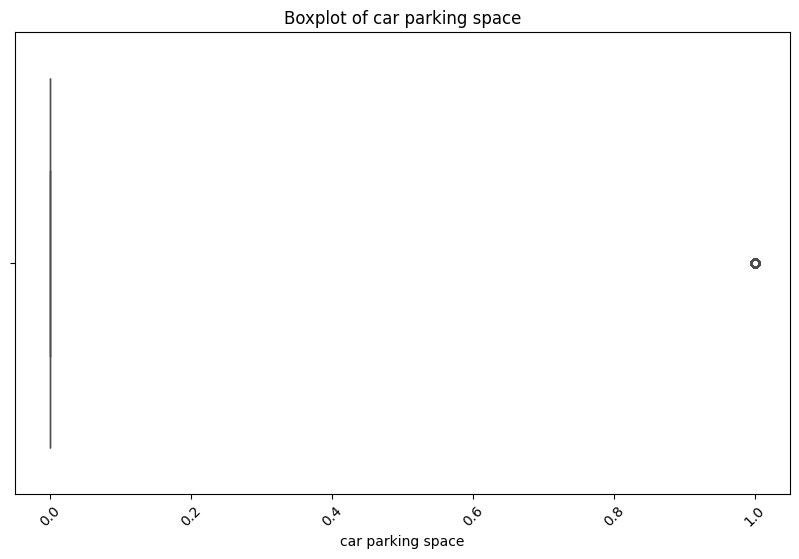

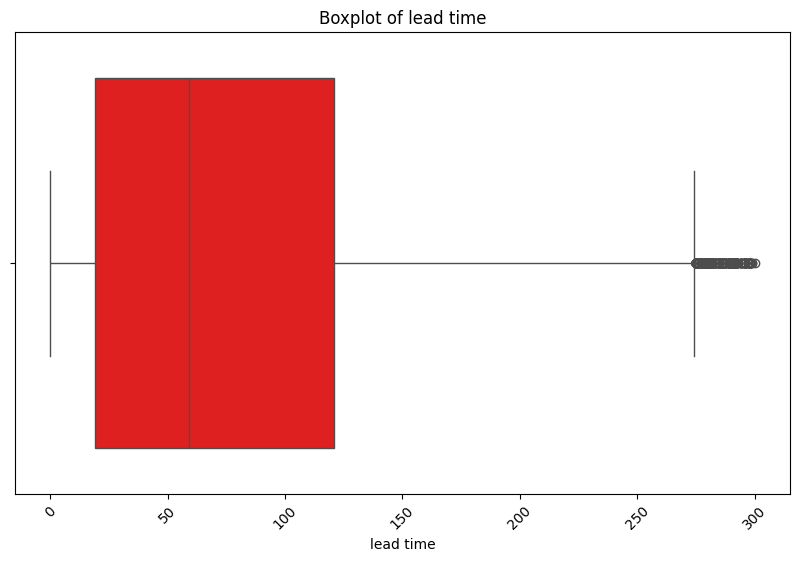

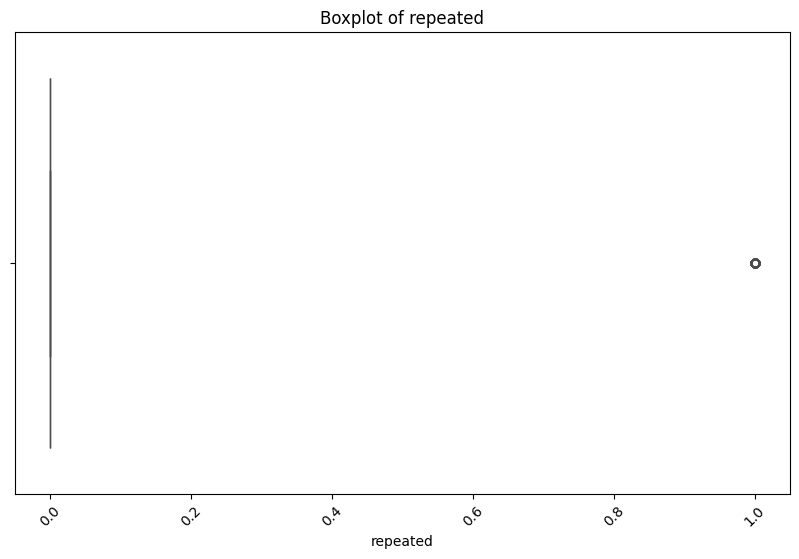

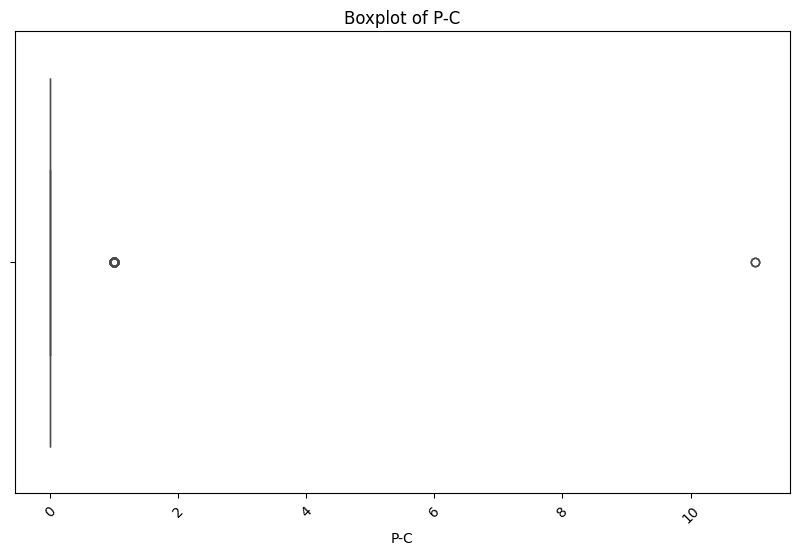

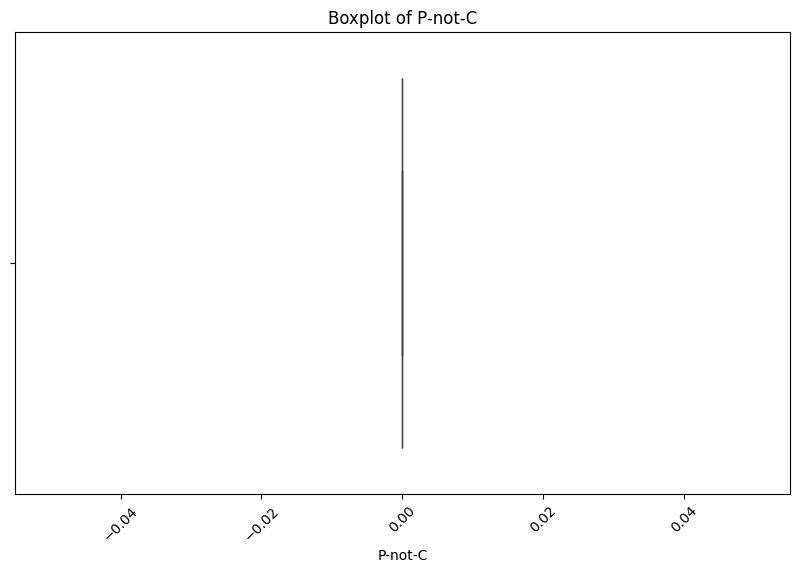

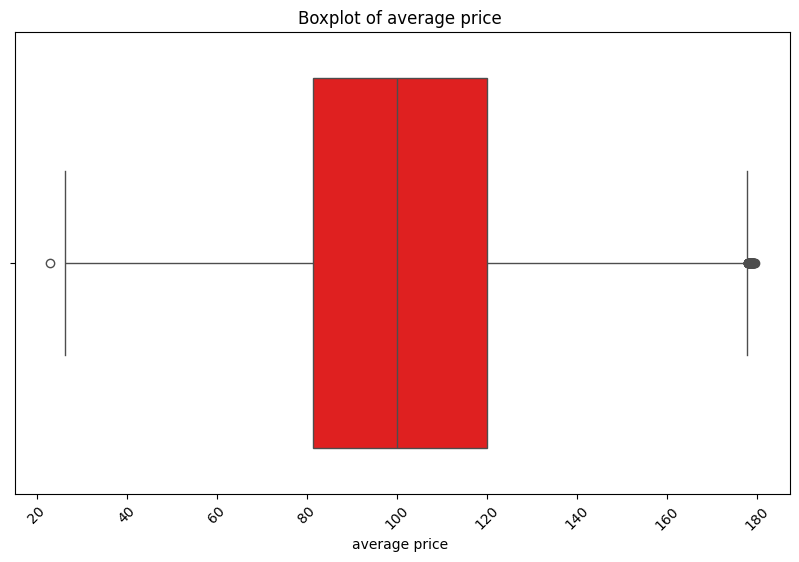

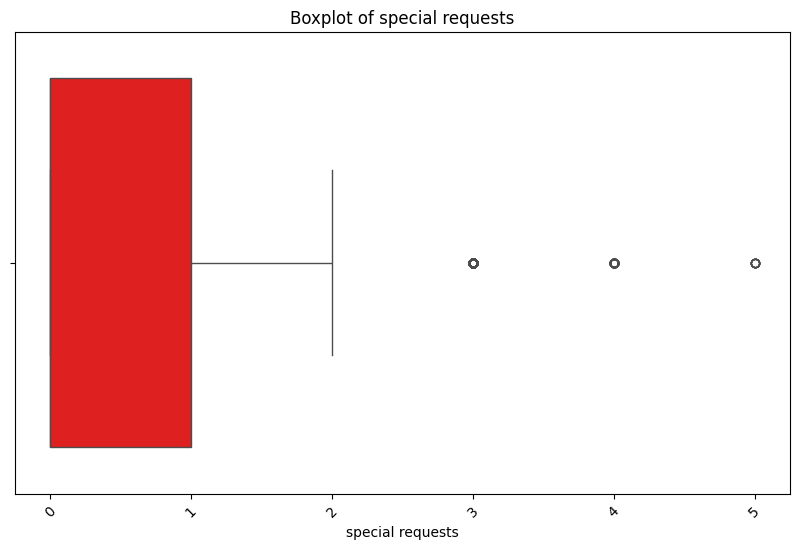

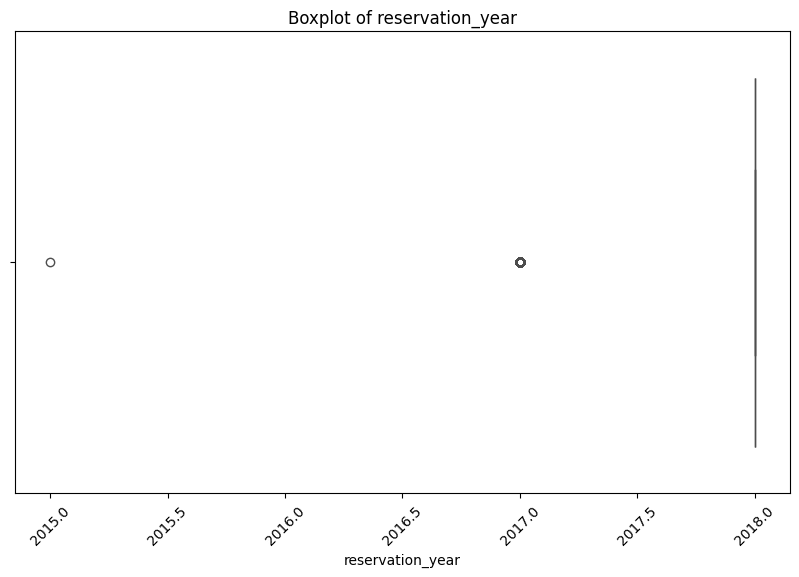

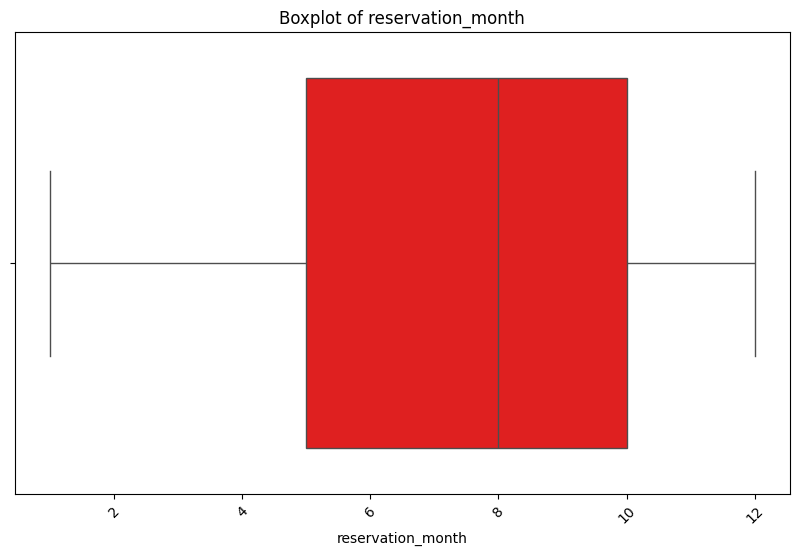

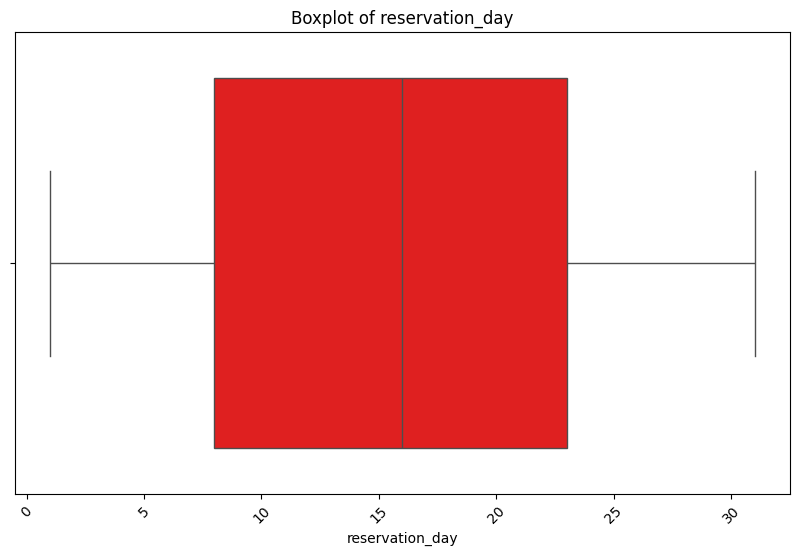

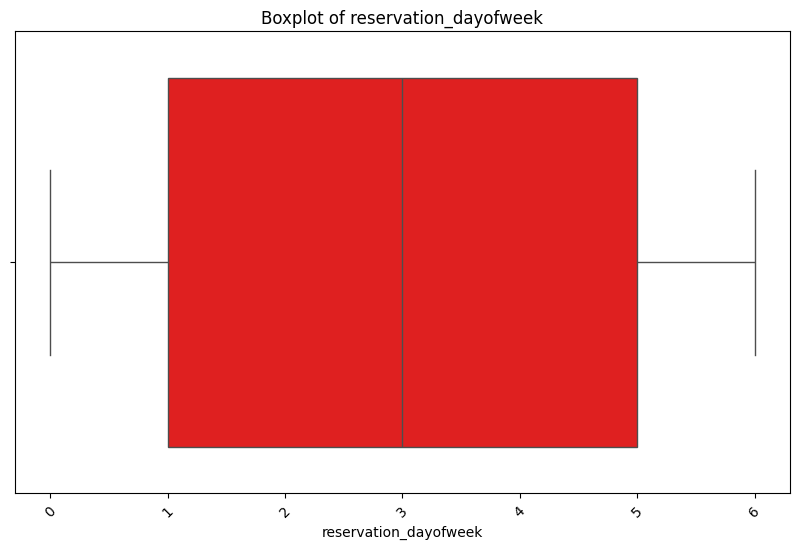

In [77]:
numeric_cols = df_removed_outliers.select_dtypes(include=['int64', 'float64']).columns

# Create boxplot for each numeric column

for column in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_removed_outliers[column], color='red')
    plt.title(f'Boxplot of {column}')
    plt.xticks(rotation=45)
    plt.show()

In [78]:
df_removed_outliers1 = df_removed_outliers.drop("Booking_ID",axis="columns")
df_removed_outliers1.columns

Index(['number of adults', 'number of children', 'number of weekend nights',
       'number of week nights', 'car parking space', 'lead time', 'repeated',
       'P-C', 'P-not-C', 'average price ', 'special requests',
       'date of reservation', 'booking status', 'reservation_year',
       'reservation_month', 'reservation_day', 'reservation_dayofweek',
       'type of meal_Meal Plan 2', 'type of meal_Meal Plan 3',
       'type of meal_Not Selected', 'room type_Room_Type 2',
       'room type_Room_Type 3', 'room type_Room_Type 4',
       'room type_Room_Type 5', 'room type_Room_Type 6',
       'room type_Room_Type 7', 'market segment type_Complementary',
       'market segment type_Corporate', 'market segment type_Offline',
       'market segment type_Online'],
      dtype='object')

In [79]:
# Fill NaN values in date-related columns
date_columns = ['reservation_month', 'reservation_day', 'reservation_dayofweek' , 'reservation_year']
df_removed_outliers1[date_columns] = df_removed_outliers[date_columns].fillna(df_removed_outliers[date_columns].mode().iloc[0])

# Verify NaN values are gone
print(df_removed_outliers1.isnull().sum())

number of adults                      0
number of children                    0
number of weekend nights              0
number of week nights                 0
car parking space                     0
lead time                             0
repeated                              0
P-C                                   0
P-not-C                               0
average price                         0
special requests                      0
date of reservation                  29
booking status                        0
reservation_year                      0
reservation_month                     0
reservation_day                       0
reservation_dayofweek                 0
type of meal_Meal Plan 2              0
type of meal_Meal Plan 3              0
type of meal_Not Selected             0
room type_Room_Type 2                 0
room type_Room_Type 3                 0
room type_Room_Type 4                 0
room type_Room_Type 5                 0
room type_Room_Type 6                 0


data standraization

In [80]:
from sklearn.preprocessing import StandardScaler

numeric_columns = ['number of adults', 'number of children', 
                  'number of weekend nights', 'number of week nights',
                  'car parking space', 'lead time', 'repeated',
                  'P-C', 'P-not-C', 'average price ', 'special requests',
                  'reservation_month', 'reservation_day', 'reservation_dayofweek']


df_with_scaling = df_removed_outliers1.copy()  
df_no_scaling = df_removed_outliers1.copy()    

# Initialize scaler
scaler = StandardScaler()

# Fit and transform numeric columns
df_with_scaling[numeric_columns] = scaler.fit_transform(df_with_scaling[numeric_columns])

# Verify the differences
print("Data without scaling (first few rows):")
print(df_no_scaling[numeric_columns].head())
print("\nData with scaling (first few rows):")
print(df_with_scaling[numeric_columns].head())

Data without scaling (first few rows):
   number of adults  number of children  number of weekend nights  \
0                 1                   1                         2   
1                 1                   0                         1   
2                 2                   1                         1   
3                 1                   0                         0   
4                 1                   0                         1   

   number of week nights  car parking space  lead time  repeated  P-C  \
0                      5                  0        224         0    0   
1                      3                  0          5         0    0   
2                      3                  0          1         0    0   
3                      2                  0        211         0    0   
4                      2                  0         48         0    0   

   P-not-C  average price   special requests  reservation_month  \
0        0           88.00              

split data before standraization


In [81]:
x = df_removed_outliers1.drop(["booking status",'date of reservation'],axis="columns")
y = df_removed_outliers1["booking status"]

In [82]:
x.columns

Index(['number of adults', 'number of children', 'number of weekend nights',
       'number of week nights', 'car parking space', 'lead time', 'repeated',
       'P-C', 'P-not-C', 'average price ', 'special requests',
       'reservation_year', 'reservation_month', 'reservation_day',
       'reservation_dayofweek', 'type of meal_Meal Plan 2',
       'type of meal_Meal Plan 3', 'type of meal_Not Selected',
       'room type_Room_Type 2', 'room type_Room_Type 3',
       'room type_Room_Type 4', 'room type_Room_Type 5',
       'room type_Room_Type 6', 'room type_Room_Type 7',
       'market segment type_Complementary', 'market segment type_Corporate',
       'market segment type_Offline', 'market segment type_Online'],
      dtype='object')

In [83]:
x.isnull().sum()

number of adults                     0
number of children                   0
number of weekend nights             0
number of week nights                0
car parking space                    0
lead time                            0
repeated                             0
P-C                                  0
P-not-C                              0
average price                        0
special requests                     0
reservation_year                     0
reservation_month                    0
reservation_day                      0
reservation_dayofweek                0
type of meal_Meal Plan 2             0
type of meal_Meal Plan 3             0
type of meal_Not Selected            0
room type_Room_Type 2                0
room type_Room_Type 3                0
room type_Room_Type 4                0
room type_Room_Type 5                0
room type_Room_Type 6                0
room type_Room_Type 7                0
market segment type_Complementary    0
market segment type_Corpo

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_remaining, y_train, y_remaining = train_test_split(x, y, test_size=0.4)

X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, test_size=0.3)

print("Size of training set:", X_train.shape[0])
print("Size of validation set:", X_val.shape[0])
print("Size of test set:", X_test.shape[0])

Size of training set: 19496
Size of validation set: 9098
Size of test set: 3900


split data after standraization

In [85]:
x_stand = df_with_scaling.drop(["booking status","date of reservation"],axis="columns")
y_stand = df_with_scaling["booking status"]

In [86]:
x_stand.columns

Index(['number of adults', 'number of children', 'number of weekend nights',
       'number of week nights', 'car parking space', 'lead time', 'repeated',
       'P-C', 'P-not-C', 'average price ', 'special requests',
       'reservation_year', 'reservation_month', 'reservation_day',
       'reservation_dayofweek', 'type of meal_Meal Plan 2',
       'type of meal_Meal Plan 3', 'type of meal_Not Selected',
       'room type_Room_Type 2', 'room type_Room_Type 3',
       'room type_Room_Type 4', 'room type_Room_Type 5',
       'room type_Room_Type 6', 'room type_Room_Type 7',
       'market segment type_Complementary', 'market segment type_Corporate',
       'market segment type_Offline', 'market segment type_Online'],
      dtype='object')

In [87]:
X_train1, X_remaining1, y_train1, y_remaining1 = train_test_split(x_stand, y_stand, test_size=0.4)

X_val1, X_test1, y_val1, y_test1 = train_test_split(X_remaining1, y_remaining1, test_size=0.3)

print("Size of training set:", X_train1.shape[0])
print("Size of validation set:", X_val1.shape[0])
print("Size of test set:", X_test1.shape[0])

Size of training set: 19496
Size of validation set: 9098
Size of test set: 3900


KNN before standraization


In [88]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()

In [89]:
model_knn.fit(X_train,y_train)

KNeighborsClassifier()

In [90]:
train_accuracy_knn = model_knn.score(X_train,y_train)
train_accuracy_knn

0.8565346737792368

In [91]:
test_accuracy_knn = model_knn.score(X_test,y_test)
test_accuracy_knn

0.7938461538461539

In [92]:
validation_accuracy_knn = model_knn.score(X_val,y_val)
validation_accuracy_knn

0.789843921741042

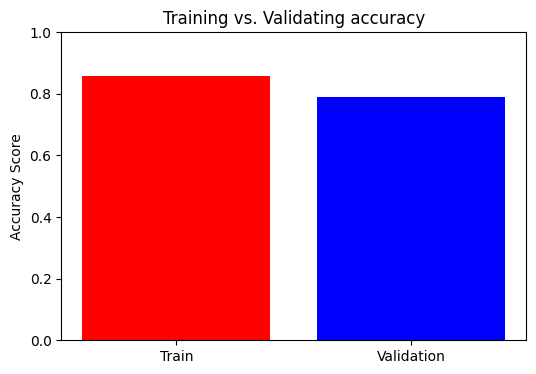

In [93]:
plt.figure(figsize=(6, 4))
plt.bar(['Train', 'Validation'], [train_accuracy_knn,validation_accuracy_knn], color=['red', 'blue'])
plt.title('Training vs. Validating accuracy')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1) 
plt.show()

KNN after standraization

In [94]:
model_knn_stand = KNeighborsClassifier()

In [95]:
model_knn_stand.fit(X_train1,y_train1)

KNeighborsClassifier()

In [96]:
train_accuracy_knn_stand = model_knn_stand.score(X_train1,y_train1)
train_accuracy_knn_stand

0.8864895363151416

In [97]:
test_accuracy_knn_stand = model_knn_stand.score(X_test1,y_test1)
test_accuracy_knn_stand

0.8207692307692308

In [98]:
validation_accuracy_knn_stand = model_knn_stand.score(X_val1,y_val1)
validation_accuracy_knn_stand

0.8354583424928556

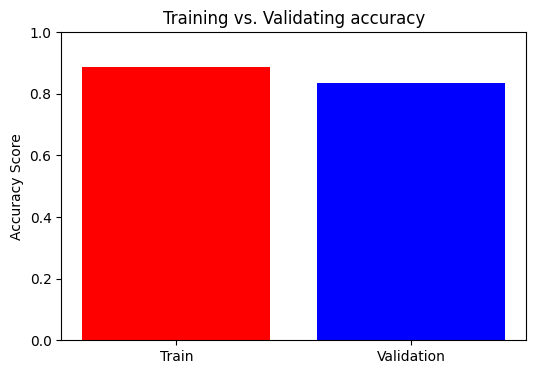

In [99]:
plt.figure(figsize=(6, 4))
plt.bar(['Train', 'Validation'], [train_accuracy_knn_stand,validation_accuracy_knn_stand], color=['red', 'blue'])
plt.title('Training vs. Validating accuracy')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1) 
plt.show()

we can see that standraization is very important in knn 

now trying manual tuning to get best accuracy

In [100]:
model_knn_2 = KNeighborsClassifier(
    n_neighbors=3,         
    weights='uniform',     
    metric='manhattan',     
    p=1
)

In [ ]:
model_knn_2.fit(X_train1,y_train1)

KNeighborsClassifier(metric='manhattan', n_neighbors=3, p=1)

In [102]:
train_knn_accuracy_2 = model_knn_2.score(X_train1,y_train1)
train_knn_accuracy_2

0.9149569142388182

In [103]:
test_knn_accuracy_2 = model_knn_2.score(X_test1,y_test1)
test_knn_accuracy_2

0.8333333333333334

In [104]:
validation_accuracy_knn_2 = model_knn_2.score(X_val1,y_val1)
validation_accuracy_knn_2

0.839964827434601

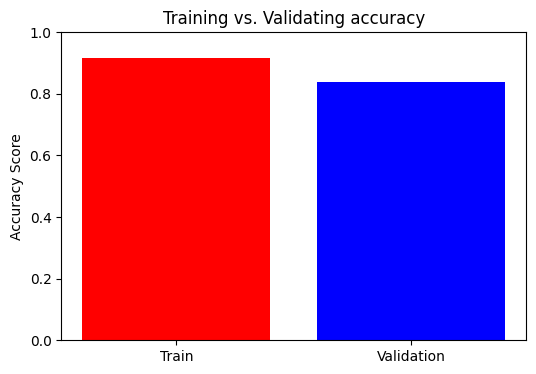

In [105]:
plt.figure(figsize=(6, 4))
plt.bar(['Train', 'Validation'], [train_knn_accuracy_2,validation_accuracy_knn_2], color=['red', 'blue'])
plt.title('Training vs. Validating accuracy')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1) 
plt.show()

testing for knn before standraization 

In [106]:
y_pred_KNN = model_knn.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score ,f1_score, confusion_matrix
KNN_acc = accuracy_score(y_test, y_pred_KNN)
KNN_per = precision_score(y_test, y_pred_KNN)
KNN_rec = recall_score(y_test, y_pred_KNN)
KNN_f1 = f1_score(y_test, y_pred_KNN)

print("Accuracy:", KNN_acc)
print("Precision:", KNN_per)
print("Recall:", KNN_rec)
print("F1 Score:", KNN_f1)

Accuracy: 0.7938461538461539
Precision: 0.8243338008415148
Recall: 0.8858327053504145
F1 Score: 0.8539774791136941


confusion matrix

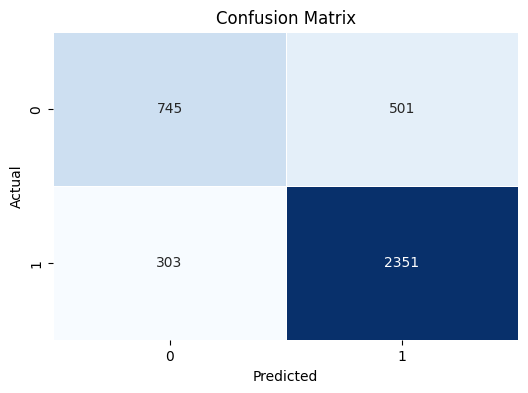

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_KNN)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

testing after standraization 

In [109]:
y_pred_KNN1 = model_knn_2.predict(X_test1)

In [110]:
KNN_acc1 = accuracy_score(y_test1, y_pred_KNN1)
KNN_per1 = precision_score(y_test1, y_pred_KNN1)
KNN_rec1 = recall_score(y_test1, y_pred_KNN1)
KNN_f1_1 = f1_score(y_test1, y_pred_KNN1)

print("Accuracy:", KNN_acc1)
print("Precision:", KNN_per1)
print("Recall:", KNN_rec1)
print("F1 Score:", KNN_f1_1)

Accuracy: 0.8333333333333334
Precision: 0.8575045207956601
Recall: 0.9025504377617054
F1 Score: 0.8794510385756676


confusion_matrix

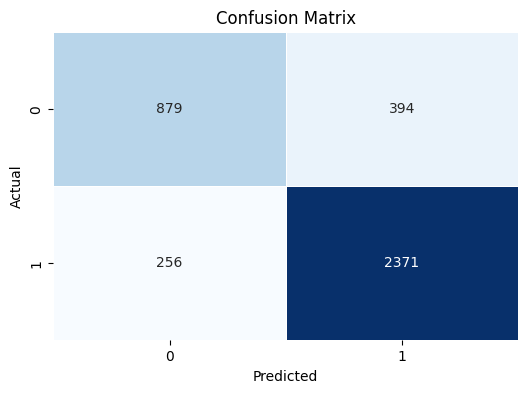

In [111]:
conf_matrix = confusion_matrix(y_test1, y_pred_KNN1)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

2 - LogisticRegression


before stand 

In [112]:
from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression()

In [113]:
model_logistic.fit(X_train,y_train)

c:\Users\Abdulrhman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [114]:
train_accuracy_logistic = model_logistic.score(X_train,y_train)
train_accuracy_logistic

0.7975995075913008

In [115]:
test_accuracy_logistic = model_logistic.score(X_test,y_test)
test_accuracy_logistic

0.8017948717948717

In [116]:
validation_accuracy_logistic = model_logistic.score(X_val,y_val)
validation_accuracy_logistic

0.7947900637502748

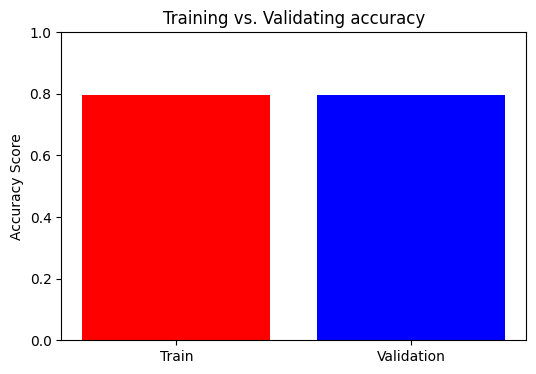

In [117]:
plt.figure(figsize=(6, 4))
plt.bar(['Train', 'Validation'], [train_accuracy_logistic,validation_accuracy_logistic], color=['red', 'blue'])
plt.title('Training vs. Validating accuracy')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1) 
plt.show()

After stand

In [118]:
model_logistic_stand = LogisticRegression()

In [119]:
model_logistic_stand.fit(X_train1,y_train1)

c:\Users\Abdulrhman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [120]:
train_accuracy_logistic_stand = model_logistic_stand.score(X_train1,y_train1)
train_accuracy_logistic_stand

0.7988818219121872

In [121]:
test_accuracy_logistic_stand = model_logistic_stand.score(X_test1,y_test1)
test_accuracy_logistic_stand

0.7892307692307692

In [122]:
validation_accuracy_logistic_stand = model_logistic_stand.score(X_val1,y_val1)
validation_accuracy_logistic_stand


0.7846779511980655

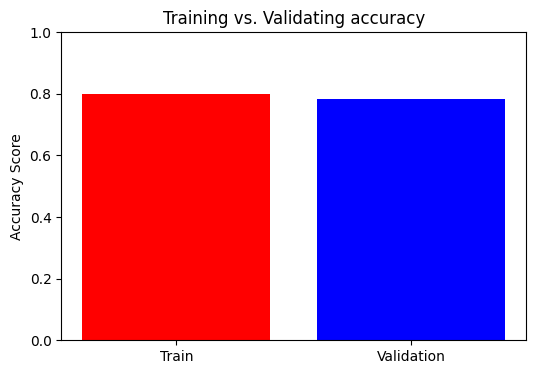

In [123]:
plt.figure(figsize=(6, 4))
plt.bar(['Train', 'Validation'], [train_accuracy_logistic_stand,validation_accuracy_logistic_stand], color=['red', 'blue'])
plt.title('Training vs. Validating accuracy')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1) 
plt.show()

as we can see that standraization has no effect on the logistic regression model 

manual tuning for the hyperparameters 


In [124]:
model_logistic_2= LogisticRegression(C=0.00001, penalty=None, solver="newton-cg",max_iter=100)

In [125]:
model_logistic_2.fit(X_train,y_train)

c:\Users\Abdulrhman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


LogisticRegression(C=1e-05, penalty=None, solver='newton-cg')

In [126]:
train_accuracy_logistic_2 = model_logistic_2.score(X_train,y_train)
train_accuracy_logistic_2


0.7963171932704144

In [127]:
test_accuracy_logistic_2 = model_logistic_2.score(X_test,y_test)
test_accuracy_logistic_2


0.8025641025641026

In [128]:
validation_accuracy_logistic_2 = model_logistic_2.score(X_val,y_val)
validation_accuracy_logistic_2

0.7948999780171466

testing logistic regression 

In [129]:
y_pred_logistic = model_logistic_2.predict(X_test)

In [130]:
Logistic_acc = accuracy_score(y_test, y_pred_logistic)
Logistic_per = precision_score(y_test, y_pred_logistic)
Logistic_rec = recall_score(y_test, y_pred_logistic)
Logistic_f1 = f1_score(y_test, y_pred_logistic)

print("Accuracy:", Logistic_acc)
print("Precision:", Logistic_per)
print("Recall:", Logistic_rec)
print("F1 Score:", Logistic_f1)

Accuracy: 0.8025641025641026
Precision: 0.8282229965156794
Recall: 0.8956292388847024
F1 Score: 0.8606082548877625


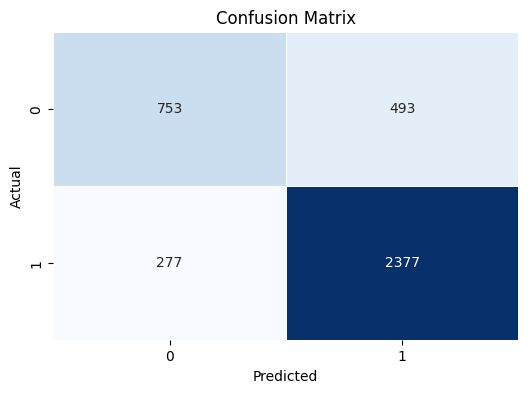

In [131]:
conf_matrix = confusion_matrix(y_test, y_pred_logistic)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

3-SVM

before stand

In [132]:
from sklearn.svm import SVC 
model_svm = SVC()


In [133]:
model_svm.fit(X_train,y_train)

SVC()

In [134]:
train_accuracy_Svm = model_svm.score(X_train,y_train)
train_accuracy_Svm

0.7571809601969635

In [135]:
test_accuracy_Svm = model_svm.score(X_test,y_test)
test_accuracy_Svm

0.764102564102564

In [136]:
validation_accuracy_Svm = model_svm.score(X_val,y_val)
validation_accuracy_Svm

0.7562101560782589

After stand

In [137]:

model_svm_stand = SVC()


In [138]:

model_svm_stand.fit(X_train1,y_train1)


SVC()

In [139]:

train_accuracy_Svm_stand = model_svm_stand.score(X_train1,y_train1)
train_accuracy_Svm_stand


0.6810627821091506

In [140]:

test_accuracy_Svm_stand = model_svm_stand.score(X_test1,y_test1)
test_accuracy_Svm_stand


0.6735897435897436

In [141]:

validation_accuracy_Svm_stand = model_svm_stand.score(X_val1,y_val1)
validation_accuracy_Svm_stand

0.6842163112772037

manual tuning


In [162]:
model_svm_2 = SVC(C=0.01, gamma=0.2,kernel="linear")

In [163]:
model_svm_2.fit(X_train1,y_train1)

SVC(C=0.01, gamma=0.2, kernel='linear')

In [164]:


train_accuracy_Svm_2 = model_svm_2.score(X_train1,y_train1)
train_accuracy_Svm_2


0.8038572014772261

In [165]:


test_accuracy_Svm_2 = model_svm_2.score(X_test1,y_test1)
test_accuracy_Svm_2


0.7915384615384615

In [166]:


validation_accuracy_Svm_2 = model_svm_2.score(X_val1,y_val1)
validation_accuracy_Svm_2

0.791272807210376

testing 

In [167]:
y_pred_SVM= model_svm_2.predict(X_test1)

In [169]:
SVM_acc = accuracy_score(y_test1, y_pred_SVM)
SVM_per = precision_score(y_test1, y_pred_SVM)
SVM_rec = recall_score(y_test1, y_pred_SVM)
SVM_f1 = f1_score(y_test1, y_pred_SVM)

print("Accuracy:", SVM_acc)
print("Precision:", SVM_per)
print("Recall:", SVM_rec)
print("F1 Score:", SVM_f1)

Accuracy: 0.7915384615384615
Precision: 0.8095563139931741
Recall: 0.9029311001141987
F1 Score: 0.8536980385099874


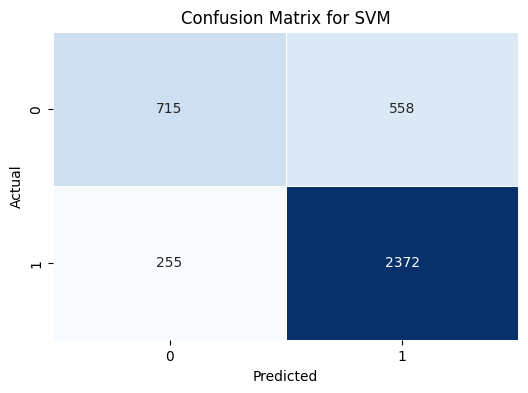

In [170]:
conf_matrix = confusion_matrix(y_test1, y_pred_SVM)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
